In [1]:
from matplotlib import pyplot as plt
import numpy as np
import scipy
import seaborn as sns
import pandas as pd

In [2]:
from spliceformats.readMATS import read_rmats

## **Read in bulk and single-cell *Clytia* rmats outputs**

In [3]:
#Annotations
#Get annotations
import requests
from tqdm import tnrange, tqdm_notebook
def download_file(doi,ext):
    url = 'https://api.datacite.org/dois/'+doi+'/media'
    r = requests.get(url).json()
    netcdf_url = r['data'][0]['attributes']['url']
    r = requests.get(netcdf_url,stream=True)
    #Set file name
    fname = doi.split('/')[-1]+ext
    #Download file with progress bar
    if r.status_code == 403:
        print("File Unavailable")
    if 'content-length' not in r.headers:
        print("Did not get file")
    else:
        with open(fname, 'wb') as f:
            total_length = int(r.headers.get('content-length'))
            #pbar = tnrange(int(total_length/1024), unit="B")
            for chunk in r.iter_content(chunk_size=1024):
                if chunk:
                    #pbar.update()
                    f.write(chunk)
        return fname
     

In [4]:
# #Human ortholog annotations
# download_file('10.22002/D1.1819','.gz')

# #Panther annotations
# download_file('10.22002/D1.1820','.gz')

# #GO Terms
# download_file('10.22002/D1.1822','.gz')

#!gunzip *D1*.gz

Read in annotations

In [5]:

from io import StringIO

hg_ortho_df = pd.read_csv(StringIO(''.join(l.replace('|', '\t') for l in open('D1.1819'))),
            sep="\t",header=None,skiprows=[0,1,2,3])

hg_ortho_df[['XLOC','TCONS']] = hg_ortho_df[13].str.split(expand=True)
hg_ortho_df[['Gene','gi']] = hg_ortho_df[3].str.split(expand=True)
hg_ortho_df['Description']= hg_ortho_df[11]


panther_df = pd.read_csv('D1.1820',
            sep="\t",header=None) #skiprows=[0,1,2,3]



goTerm_df = pd.read_csv('D1.1822',
            sep=" ",header=None) #skiprows=[0,1,2,3]

In [6]:
goTerm_df.head()

,0,1
0,XLOC_000001,NaN
1,XLOC_000002,"GO:0043234,GO:0016020,GO:0016021,GO:0009987,GO..."
2,XLOC_000003,NaN
3,XLOC_000004,"GO:0016787,GO:0006629,GO:0044238,GO:0016788,GO..."
4,XLOC_000005,"GO:0006732,GO:0003824,GO:0016740,GO:0008152,GO..."


In [7]:
#Protein annotations (MSTRG --> XLOC mapping)
c_hem_nr_t2g = pd.read_csv('/home/tchari/clytia_alt_splice/reference/c_hem_nr_t2g.csv')
c_hem_nr_t2g.head()

# Example conversion
# xlocs = list(c_hem_nr_t2g['0'][c_hem_nr_t2g['1'].isin(list(sig_data.GeneID))])
# gIds = list(c_hem_nr_t2g['1'][c_hem_nr_t2g['1'].isin(list(sig_data.GeneID))])
# len(xlocs)

,0,1,2,3,4,5,6,7,8,9
0,XLOC_019238,MSTRG.1,MSTRG.1.1.p1,MSTRG.1~~MSTRG.1.1.p1,NaN,ORF,type:complete,len:362,"(+),score=61.36",MSTRG.1.1:22-1107(+)
1,MASFYTPRKKTKMADNPGDIEITGYVNYVGPRKTSYFEVYLCDETK...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MSTRG.10,MSTRG.10.1.p1,MSTRG.10~~MSTRG.10.1.p1,NaN,ORF,type:complete,len:191,"(+),score=14.04",MSTRG.10.1:367-939(+),NaN
3,MIEDKITEEKSQKRLKLEKVTLTSNANQQQFDFNKQVIDIIEKSER...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,XLOC_004572,MSTRG.100,MSTRG.100.1.p1,MSTRG.100~~MSTRG.100.1.p1,NaN,ORF,type:complete,len:602,"(+),score=115.30,Y_phosphatase|PF00102.24|6.3e...",MSTRG.100.1:124-1929(+)


Read in rmats outputs

In [8]:
data_path = '/home/tchari/clytia_alt_splice/rmats_out/'
singles = ['p2','mf','m','go','fedsw_mf_2']
comps = ['mf_p2', 'mf_m','p2_go','mf_go','nem_starv_2'] # mf_go , + new single-cell (higher read alignment)
all_data = singles+comps

data_arr = []
for d in all_data:
    p=data_path+'rmats_'+d+'.tar.gz'
    print(p)
    data_arr+=[read_rmats(p)]


/home/tchari/clytia_alt_splice/rmats_out/rmats_p2.tar.gz
SE
MXE
RI
A5SS
/home/tchari/clytia_alt_splice/rmats_out/rmats_mf.tar.gz
SE
MXE
RI
A5SS
/home/tchari/clytia_alt_splice/rmats_out/rmats_m.tar.gz
SE
MXE
RI
A5SS
/home/tchari/clytia_alt_splice/rmats_out/rmats_go.tar.gz
SE
MXE
A3SS
RI
A5SS
/home/tchari/clytia_alt_splice/rmats_out/rmats_fedsw_mf_2.tar.gz
SE
MXE
A3SS
RI
A5SS
/home/tchari/clytia_alt_splice/rmats_out/rmats_mf_p2.tar.gz
/home/tchari/clytia_alt_splice/rmats_out/rmats_mf_m.tar.gz
/home/tchari/clytia_alt_splice/rmats_out/rmats_p2_go.tar.gz
/home/tchari/clytia_alt_splice/rmats_out/rmats_mf_go.tar.gz
/home/tchari/clytia_alt_splice/rmats_out/rmats_nem_starv_2.tar.gz


In [9]:
len(data_arr)

10

Text(0, 0.5, 'Fed Nem PSI (psi)')

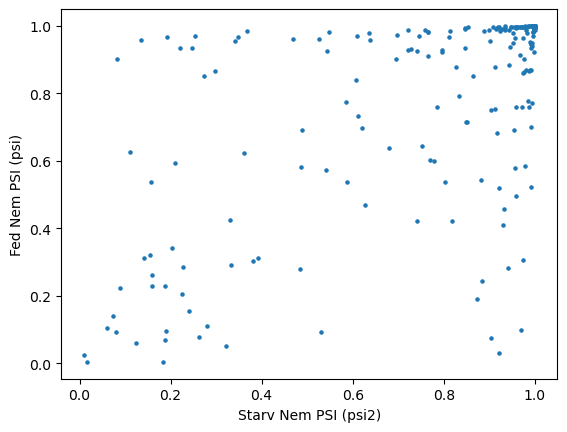

In [10]:
#Look at nematocytes
plt.scatter(data_arr[-1].SE.psi2, data_arr[-1].SE.psi1, s=5)
plt.xlabel('Starv Nem PSI (psi2)')
plt.ylabel('Fed Nem PSI (psi)')

Read in featureCounts matrices (from bams)

In [11]:
# featureCounts -T 5 -a /home/tchari/clytia_alt_splice/reference/transcripts.fa.transdecoder.genome_geneAndTrans.gtf \
# -t exon -g gene_id \
# -o ./counts/sw.txt \
# /data/tchari/rmats_out/rmats_fedsw_mf_2_tmp/fed_sw_bam1_2/Aligned.sortedByCoord.out.bam

# featureCounts -T 5 \
# -a /home/tchari/clytia_alt_splice/reference/transcripts.fa.transdecoder.genome_geneAndTrans.gtf \
# -t exon -g gene_id -o ./counts/mf_2.txt \
# /data/tchari/rmats_out/rmats_mf_tmp/2024-11-04-21_17_30_048680_bam1_2/Aligned.sortedByCoord.out.bam


### **Correct data with shrinkage**

In [12]:
from spliceformats.shrinkage import shrink_rMATS

corr_data=[shrink_rMATS(d) for d in data_arr]

Text(0, 0.5, 'Fed Nem PSI (psi1)')

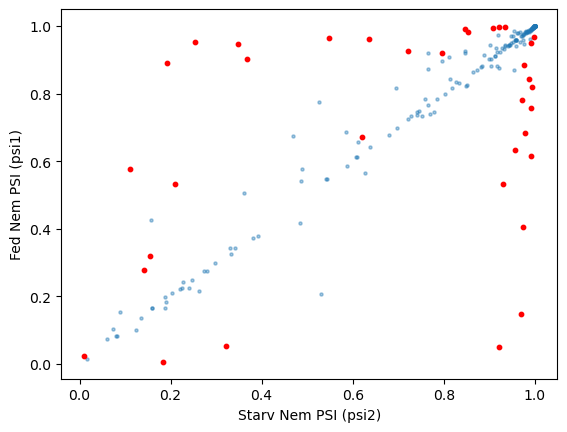

In [13]:
#Look at nematocytes
sig=data_arr[-1].SE.fdr<.1
plt.scatter(corr_data[-1].SE.psi2, corr_data[-1].SE.psi1, s=5, alpha=.4)
plt.scatter(corr_data[-1].SE.psi2[sig], corr_data[-1].SE.psi1[sig], s=10, c='r', label='sig')
plt.xlabel('Starv Nem PSI (psi2)')
plt.ylabel('Fed Nem PSI (psi1)')


## **General AS trends over all samples**

### **Bulk rna samples across life stages**

#### Across stage metrics

In [14]:
#For single conds data_arr[4].data['SE'], indices 0 to 4
events = ['SE','A5SS','A3SS','MXE','RI']

In [15]:
data_arr[0].data['SE'][0:4].GeneID

0    MSTRG.9139
1    MSTRG.9137
2    MSTRG.9124
3    MSTRG.9061
Name: GeneID, dtype: object

In [16]:
#For each data
types = []
stages = []
counts = []
genes = []

for d in range(len(singles)):
    for e in events:
        sub = data_arr[d].data[e]
        if len(sub) != 0:
        #Remove IncLevel1 with 'Na'
            ijcs = np.array([(np.float64(i.split(',')[0])+np.float64(i.split(',')[1]))/2 > 50 for i in sub.IJC_SAMPLE_1])
            sjcs = np.array([(np.float64(i.split(',')[0])+np.float64(i.split(',')[1]))/2 > 50 for i in sub.SJC_SAMPLE_1])
            incs = np.array([('1.0' not in i) and ('NA' not in i) and ('0.0' not in i) for i in sub.IncLevel1])
            counts += [len(sub[ijcs&sjcs&incs])]
            types += [e]
            stages +=[all_data[d]]
            genes += [list(sub[ijcs&sjcs&incs].GeneID)]
            

bulk_sing_res = pd.DataFrame()
bulk_sing_res['Event'] = types
bulk_sing_res['Count'] = counts
bulk_sing_res['Stage'] = stages
bulk_sing_res['Genes'] = genes
bulk_sing_res.head()
#Convert to float64 'IncLevel1'][0].split(',')[1])

,Event,Count,Stage,Genes
0,SE,62,p2,"[MSTRG.8067, MSTRG.8067, MSTRG.6120, MSTRG.437..."
1,A5SS,13,p2,"[MSTRG.7779, MSTRG.6044, MSTRG.22051, MSTRG.55..."
2,MXE,133,p2,"[MSTRG.8772, MSTRG.8067, MSTRG.7905, MSTRG.788..."
3,RI,5,p2,"[MSTRG.4543, MSTRG.621, MSTRG.9648, MSTRG.1000..."
4,SE,27,mf,"[MSTRG.6581, MSTRG.3468, MSTRG.2491, MSTRG.249..."


In [50]:
bulk_sing_res['num_Genes'] = [len(i) for i in bulk_sing_res['Genes']]
bulk_sing_res.head()

,Event,Count,Stage,Genes,num_Genes
0,SE,62,p2,"[MSTRG.8067, MSTRG.8067, MSTRG.6120, MSTRG.437...",62
1,A5SS,13,p2,"[MSTRG.7779, MSTRG.6044, MSTRG.22051, MSTRG.55...",13
2,MXE,133,p2,"[MSTRG.8772, MSTRG.8067, MSTRG.7905, MSTRG.788...",133
3,RI,5,p2,"[MSTRG.4543, MSTRG.621, MSTRG.9648, MSTRG.1000...",5
4,SE,27,mf,"[MSTRG.6581, MSTRG.3468, MSTRG.2491, MSTRG.249...",27


Text(0.5, 1.0, 'AS Event Count Clytia Stages')

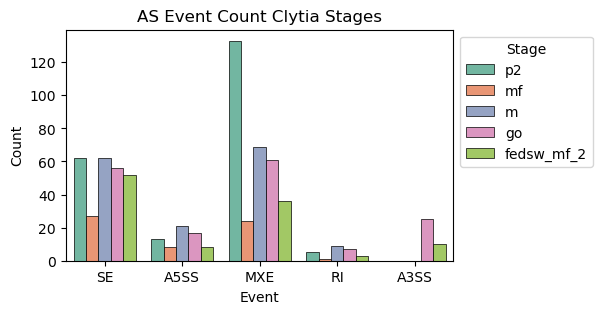

In [17]:
plt.figure(figsize=(5,3))
ax=sns.barplot(x='Event',y='Count',hue='Stage',data=bulk_sing_res,palette='Set2',edgecolor='black',linewidth=0.5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('AS Event Count Clytia Stages')

In [18]:
#Test lower threshold
#For each data
types = []
stages = []
counts = []
genes = []

for d in range(len(singles)):
    for e in events:
        sub = data_arr[d].data[e]
        if len(sub) != 0:
        #Remove IncLevel1 with 'Na'
            ijcs = np.array([(np.float64(i.split(',')[0])+np.float64(i.split(',')[1]))/2 > 10 for i in sub.IJC_SAMPLE_1])
            sjcs = np.array([(np.float64(i.split(',')[0])+np.float64(i.split(',')[1]))/2 > 10 for i in sub.SJC_SAMPLE_1])
            incs = np.array([('1.0' not in i) and ('NA' not in i) and ('0.0' not in i) for i in sub.IncLevel1])
            counts += [len(sub[ijcs&sjcs&incs])]
            types += [e]
            stages +=[all_data[d]]
            genes += [list(sub[ijcs&sjcs&incs].GeneID)]
            

bulk_sing_res_low = pd.DataFrame()
bulk_sing_res_low['Event'] = types
bulk_sing_res_low['Count'] = counts
bulk_sing_res_low['Stage'] = stages
bulk_sing_res_low['Genes'] = genes
bulk_sing_res_low.head()
#Convert to float64 'IncLevel1'][0].split(',')[1])

,Event,Count,Stage,Genes
0,SE,227,p2,"[MSTRG.8654, MSTRG.8427, MSTRG.8067, MSTRG.806..."
1,A5SS,66,p2,"[MSTRG.8308, MSTRG.7814, MSTRG.6253, MSTRG.611..."
2,MXE,210,p2,"[MSTRG.8772, MSTRG.8067, MSTRG.7905, MSTRG.788..."
3,RI,21,p2,"[MSTRG.8805, MSTRG.7223, MSTRG.4543, MSTRG.394..."
4,SE,147,mf,"[MSTRG.7442, MSTRG.7335, MSTRG.6620, MSTRG.658..."


Text(0.5, 1.0, 'AS Event Count Clytia Stages')

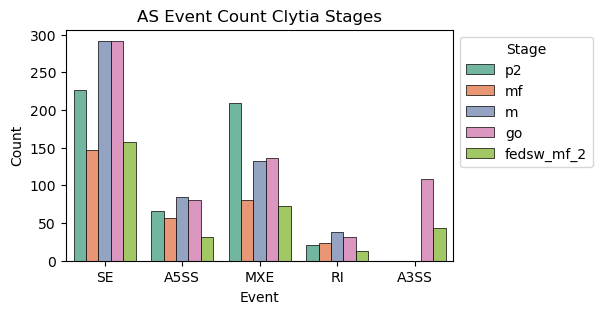

In [19]:
plt.figure(figsize=(5,3))
ax=sns.barplot(x='Event',y='Count',hue='Stage',data=bulk_sing_res_low,palette='Set2',edgecolor='black',linewidth=0.5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('AS Event Count Clytia Stages')

In [20]:
#Overlap between genes in each event between pairs of stages
overlaps = np.zeros((len(singles),len(singles),len(events)))
overlaps_vsBulk = np.zeros((len(singles),len(singles),len(events)))

#Jaccard distance
for d in range(len(singles)):
    for i in range(len(events)):
        e = events[i]
        sub_gs = bulk_sing_res.Genes[bulk_sing_res.Event.isin([e]) & bulk_sing_res.Stage.isin([singles[d]])]
        
        if len(sub_gs) != 0:
            sub_gs = sub_gs.iloc[0]

            for y in range(d,len(singles)):
                
                sub_gs_y = bulk_sing_res.Genes[bulk_sing_res.Event.isin([e]) & bulk_sing_res.Stage.isin([singles[y]])]
                if len(sub_gs_y) != 0:
                    sub_gs_y = sub_gs_y.iloc[0]
                    jac = len(set(sub_gs).intersection(sub_gs_y))/(len(set(sub_gs))+len(set(sub_gs_y))-len(set(sub_gs).intersection(sub_gs_y)))
                    overlaps[d,y,i] = jac
                    overlaps[y,d,i] = jac
                    jac_vsbulk = len(set(sub_gs).intersection(sub_gs_y))/(len(set(sub_gs)))
                    overlaps_vsBulk[d,y,i] = jac_vsbulk
                    overlaps_vsBulk[y,d,i] = jac_vsbulk

np.sum(overlaps)
        

37.8998864443153

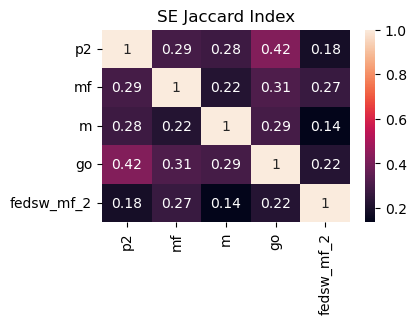

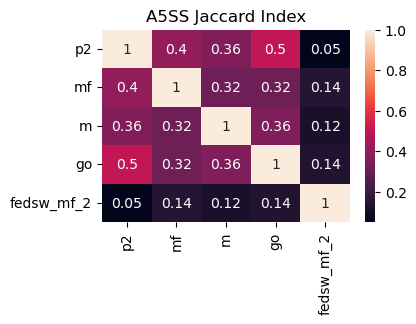

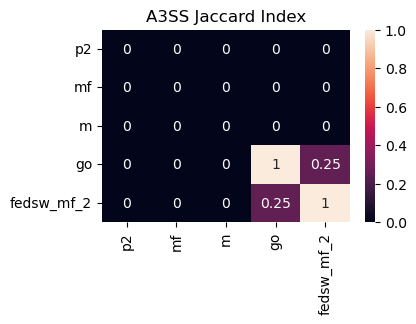

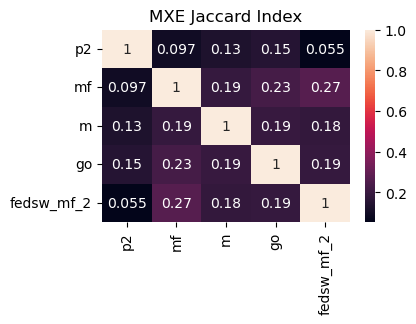

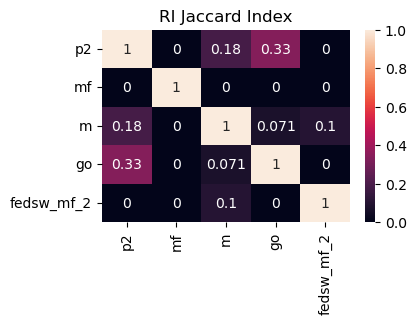

In [21]:
for i in range(len(events)):
    plt.figure(figsize=(4,2.5))
    plt.title(events[i]+' Jaccard Index')
    df = pd.DataFrame(overlaps[:,:,i])
    df.columns = singles
    df.index = singles
    sns.heatmap(data=df,annot=True)

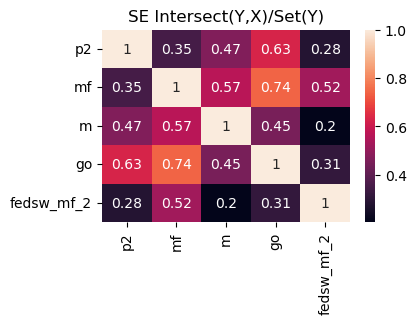

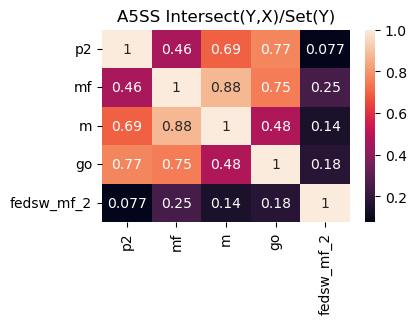

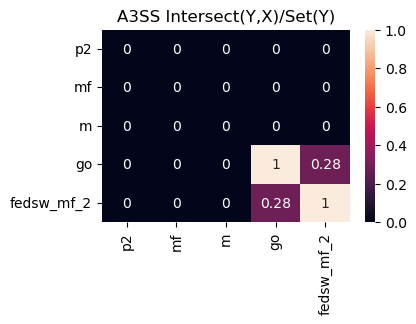

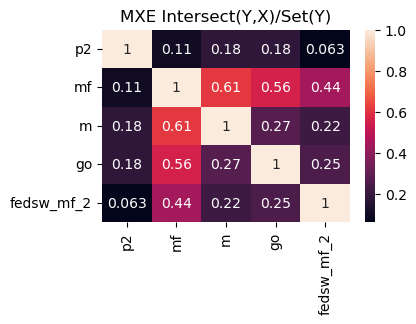

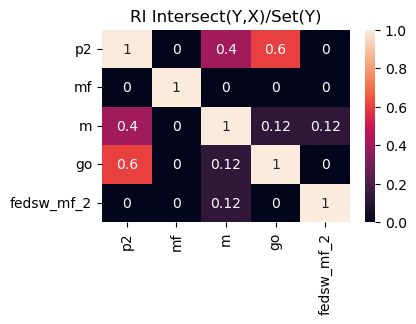

In [22]:
for i in range(len(events)):
    plt.figure(figsize=(4,2.5))
    plt.title(events[i]+' Intersect(Y,X)/Set(Y)')
    df = pd.DataFrame(overlaps_vsBulk[:,:,i])
    df.columns = singles
    df.index = singles
    sns.heatmap(data=df,annot=True)

In [23]:
#Overlap between genes in each event between pairs of stages
overlaps = np.zeros((len(singles),len(singles),len(events)))
overlaps_vsBulk = np.zeros((len(singles),len(singles),len(events)))

#Jaccard distance
for d in range(len(singles)):
    for i in range(len(events)):
        e = events[i]
        sub_gs = bulk_sing_res_low.Genes[bulk_sing_res_low.Event.isin([e]) & bulk_sing_res_low.Stage.isin([singles[d]])]
        
        if len(sub_gs) != 0:
            sub_gs = sub_gs.iloc[0]

            for y in range(d,len(singles)):
                
                sub_gs_y = bulk_sing_res_low.Genes[bulk_sing_res_low.Event.isin([e]) & bulk_sing_res_low.Stage.isin([singles[y]])]
                if len(sub_gs_y) != 0:
                    sub_gs_y = sub_gs_y.iloc[0]
                    jac = len(set(sub_gs).intersection(sub_gs_y))/(len(set(sub_gs))+len(set(sub_gs_y))-len(set(sub_gs).intersection(sub_gs_y)))
                    overlaps[d,y,i] = jac
                    overlaps[y,d,i] = jac
                    jac_vsbulk = len(set(sub_gs).intersection(sub_gs_y))/(len(set(sub_gs)))
                    overlaps_vsBulk[d,y,i] = jac_vsbulk
                    overlaps_vsBulk[y,d,i] = jac_vsbulk

np.sum(overlaps)
        

47.087568912989894

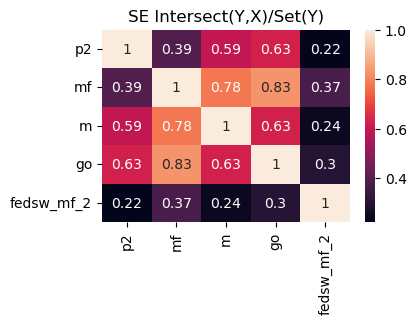

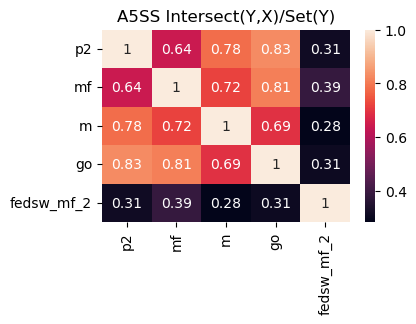

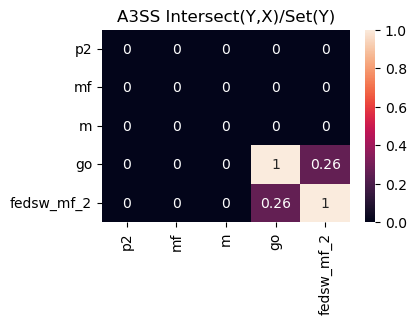

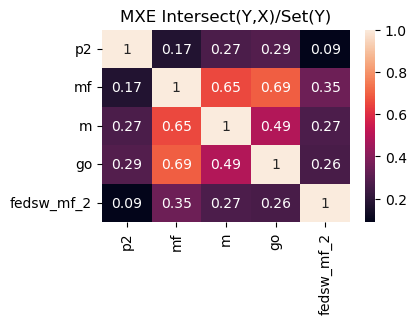

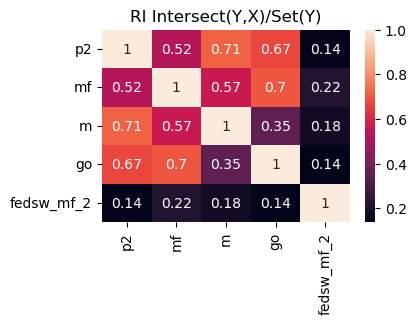

In [25]:
for i in range(len(events)):
    plt.figure(figsize=(4,2.5))
    plt.title(events[i]+' Intersect(Y,X)/Set(Y)')
    df = pd.DataFrame(overlaps_vsBulk[:,:,i])
    df.columns = singles
    df.index = singles
    sns.heatmap(data=df,annot=True)

##### **WHICH GENES WITH HIGH IncLevel1 in MMF,SC**

Look at annotations


In [202]:
all_data

['p2',
 'mf',
 'm',
 'go',
 'fedsw_mf_2',
 'mf_p2',
 'mf_m',
 'p2_go',
 'mf_go',
 'nem_starv_2']

In [227]:
#MMF
mf_incnotNA = data_arr[1].data['SE'][[(('NA' not in i) & ('1.0' not in i) & ('0.0' not in i)) for i in data_arr[1].data['SE'].IncLevel1]]
mf_incnotNA.head()

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
2,2,MSTRG.9137,NaN,chrSckGQDu_149;HRSCAF=336,-,25782981,25783071,25781790,25782059,25783561,...,"8,5",NaN,NaN,148,74,NaN,NaN,"0.802,0.901",NaN,NaN
17,17,MSTRG.8693,NaN,chrSckGQDu_149;HRSCAF=336,-,18207039,18207137,18206580,18206730,18207923,...,"1,3",NaN,NaN,148,74,NaN,NaN,"0.966,0.931",NaN,NaN
20,20,MSTRG.8600,NaN,chrSckGQDu_149;HRSCAF=336,+,16844803,16844833,16841833,16841884,16845043,...,"8,1",NaN,NaN,104,74,NaN,NaN,"0.721,0.942",NaN,NaN
24,24,MSTRG.8515,NaN,chrSckGQDu_149;HRSCAF=336,+,15053388,15053435,15053211,15053268,15053892,...,"3,2",NaN,NaN,121,74,NaN,NaN,"0.29,0.55",NaN,NaN
25,25,MSTRG.8500,NaN,chrSckGQDu_149;HRSCAF=336,+,14869742,14869828,14861411,14861616,14870273,...,"3,2",NaN,NaN,148,74,NaN,NaN,"0.938,0.964",NaN,NaN


In [228]:
filt1 = np.array([(np.float64(j.split(',')[0])+np.float64(j.split(',')[1]))>50 for j in mf_incnotNA.IJC_SAMPLE_1])
filt2 = np.array([(np.float64(j.split(',')[0])+np.float64(j.split(',')[1]))>50 for j in mf_incnotNA.SJC_SAMPLE_1])

mf_incnotNA[filt1&filt2]

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
65,65,MSTRG.7335,NaN,chrSckGQDu_148;HRSCAF=334,-,22487381,22487435,22486518,22486620,22487591,...,"45,31",NaN,NaN,128,74,NaN,NaN,"0.243,0.374",NaN,NaN
89,89,MSTRG.6581,NaN,chrSckGQDu_148;HRSCAF=334,-,11047829,11048017,11047426,11047645,11048145,...,"85,66",NaN,NaN,148,74,NaN,NaN,"0.395,0.405",NaN,NaN
91,91,MSTRG.6559,NaN,chrSckGQDu_148;HRSCAF=334,-,10606173,10606438,10605260,10606033,10606612,...,"36,36",NaN,NaN,148,74,NaN,NaN,"0.52,0.486",NaN,NaN
160,160,MSTRG.5671,NaN,chrSckGQDu_13;HRSCAF=20,-,22342946,22342999,22341082,22341204,22345892,...,"43,28",NaN,NaN,127,74,NaN,NaN,"0.854,0.907",NaN,NaN
225,225,MSTRG.25625,NaN,chrSckGQDu_9;HRSCAF=16,-,19065116,19065152,19064608,19064689,19067977,...,"31,33",NaN,NaN,110,74,NaN,NaN,"0.323,0.416",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,2121,MSTRG.18140,NaN,chrSckGQDu_197;HRSCAF=482,+,25762991,25763162,25762479,25762650,25763572,...,"22,32",NaN,NaN,148,74,NaN,NaN,"0.821,0.799",NaN,NaN
2140,2140,MSTRG.18476,NaN,chrSckGQDu_198;HRSCAF=491,+,1966027,1966207,1965551,1965663,1968048,...,"36,44",NaN,NaN,148,74,NaN,NaN,"0.617,0.607",NaN,NaN
2152,2152,MSTRG.4396,NaN,chrSckGQDu_13;HRSCAF=20,+,1262392,1262855,1261709,1262091,1263102,...,"51,43",NaN,NaN,148,74,NaN,NaN,"0.362,0.449",NaN,NaN
2217,2217,MSTRG.15982,NaN,chrSckGQDu_17;HRSCAF=24,-,30580151,30580223,30579688,30579935,30580367,...,"97,90",NaN,NaN,146,74,NaN,NaN,"0.824,0.82",NaN,NaN


In [229]:
mf_inclev_genes = np.unique(mf_incnotNA.GeneID[filt1&filt2])
mf_inclev_xlocs = list(c_hem_nr_t2g['0'][c_hem_nr_t2g['1'].isin(mf_inclev_genes)])

In [230]:
hg_ortho_df[hg_ortho_df.XLOC.isin(mf_inclev_xlocs)] 

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,XLOC,TCONS,Gene,gi,Description
290,708,18526,Hs,SRSF4 gi,21361282,ref,NP_005617.2,gi,21361282,ref,...,g.62928 ORF TCONS_00051515,g.62928 TCONS_00051515,m.62928 type:complete len:481 (+) TCONS_000515...,1:1,NaN,XLOC_032647,TCONS_00051515,SRSF4,gi,serine/arginine-rich splicing factor 4 [Homo ...
295,711,17434,Hs,SRSF1 gi,5902076,ref,NP_008855.1,gi,5902076,ref,...,g.58757 ORF TCONS_00048539,g.58757 TCONS_00048539,m.58757 type:complete len:205 (+) TCONS_000485...,many:many,NaN,XLOC_030861,TCONS_00048539,SRSF1,gi,serine/arginine-rich splicing factor 1 isofor...
299,716,17434,Hs,SRSF9 gi,4506903,ref,NP_003760.1,gi,4506903,ref,...,g.58757 ORF TCONS_00048539,g.58757 TCONS_00048539,m.58757 type:complete len:205 (+) TCONS_000485...,many:many,49757.0,XLOC_030861,TCONS_00048539,SRSF9,gi,serine/arginine-rich splicing factor 9 [Homo ...
636,1592,19467,Hs,NCL gi,55956788,ref,NP_005372.2,gi,55956788,ref,...,g.66496 ORF TCONS_00054159,g.66496 TCONS_00054159,m.66496 type:complete len:609 (+) TCONS_000541...,1:1,NaN,XLOC_034176,TCONS_00054159,NCL,gi,nucleolin [Homo sapiens]
1301,3430,10472,Hs,PDZK1 gi,21361142,ref,NP_002605.2,gi,21361142,ref,...,g.39833 ORF TCONS_00028770,g.39833 TCONS_00028770,m.39833 type:complete len:660 (+) TCONS_000287...,1:1,NaN,XLOC_016314,TCONS_00028770,PDZK1,gi,Na(+)/H(+) exchange regulatory cofactor NHE-R...
2042,5560,716,Hs,TMEM214 gi,530367729,ref,XP_005264438.1,gi,530367729,ref,...,g.3021 ORF TCONS_00001970,g.3021 TCONS_00001970,m.3021 type:complete len:722 (+) TCONS_0000197...,1:1,5363.0,XLOC_001015,TCONS_00001970,TMEM214,gi,PREDICTED: transmembrane protein 214 isoform ...
2457,6708,22461,Hs,SLC25A29 gi,578825499,ref,XP_006720101.1,gi,578825499,ref,...,g.76170 ORF TCONS_00062183,g.76170 TCONS_00062183,m.76170 type:complete len:257 (+) TCONS_000621...,1:many,NaN,XLOC_038989,TCONS_00062183,SLC25A29,gi,PREDICTED: mitochondrial basic amino acids tr...
3009,8262,21216,Hs,VAMP4 gi,42544207,ref,NP_003753.2,gi,42544207,ref,...,g.71870 ORF TCONS_00058814,g.71870 TCONS_00058814,m.71870 type:complete len:141 (+) TCONS_000588...,1:1,NaN,XLOC_037056,TCONS_00058814,VAMP4,gi,vesicle-associated membrane protein 4 isoform...
3822,10235,12205,Hs,RRBP1 gi,110611220,ref,NP_004578.2,gi,110611220,ref,...,g.45649 ORF TCONS_00033525,g.45649 TCONS_00033525,m.45649 type:complete len:801 (+) TCONS_000335...,1:1,NaN,XLOC_019433,TCONS_00033525,RRBP1,gi,ribosome-binding protein 1 [Homo sapiens]
4511,12169,680,Hs,FLG2 gi,767909261,ref,XP_011507833.1,gi,767909261,ref,...,g.3013 ORF TCONS_00001840,g.3013 TCONS_00001840,m.3013 type:complete len:1483 (+) TCONS_000018...,1:many,NaN,XLOC_000973,TCONS_00001840,FLG2,gi,PREDICTED: filaggrin-2 isoform X1 [Homo sapiens]


In [231]:
genes = hg_ortho_df[hg_ortho_df.XLOC.isin(mf_inclev_xlocs)].Gene
for g in genes:
    print(g)

SRSF4
SRSF1
SRSF9
NCL
PDZK1
TMEM214
SLC25A29
VAMP4
RRBP1
FLG2
ZDHHC20
DSTYK
PROM1
PRKCSH
RPS27A
ATE1
RPS7
GNL2
ZDHHC15
PROM2
COPZ1
RACGAP1
LOC105378220


In [232]:
#single-cell


mf_incnotNA = data_arr[4].data['SE'][[(('NA' not in i) & ('1.0' not in i) & ('0.0' not in i)) for i in data_arr[4].data['SE'].IncLevel1]]
mf_incnotNA.head()

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
1,1,MSTRG.9137,NaN,chrSckGQDu_149;HRSCAF=336,-,25782981,25783071,25781790,25782059,25783561,...,"9,17",NaN,NaN,240,150,NaN,NaN,"0.78,0.901",NaN,NaN
2,2,MSTRG.9124,NaN,chrSckGQDu_149;HRSCAF=336,-,26094630,26094702,25542738,25542810,26103830,...,"4,37",NaN,NaN,222,150,NaN,NaN,"0.253,0.192",NaN,NaN
16,16,MSTRG.8602,NaN,chrSckGQDu_149;HRSCAF=336,+,16885976,16886213,16885464,16885710,16886446,...,"1,19",NaN,NaN,300,150,NaN,NaN,"0.986,0.957",NaN,NaN
25,25,MSTRG.8498,NaN,chrSckGQDu_149;HRSCAF=336,+,14845887,14845966,14845468,14845581,14846158,...,"8,2",NaN,NaN,229,150,NaN,NaN,"0.995,0.994",NaN,NaN
32,32,MSTRG.8251,NaN,chrSckGQDu_149;HRSCAF=336,+,11315563,11315649,11315149,11315428,11316688,...,"5,4",NaN,NaN,236,150,NaN,NaN,"0.882,0.951",NaN,NaN


In [233]:
filt1 = np.array([(np.float64(j.split(',')[0])+np.float64(j.split(',')[1]))>50 for j in mf_incnotNA.IJC_SAMPLE_1])
filt2 = np.array([(np.float64(j.split(',')[0])+np.float64(j.split(',')[1]))>50 for j in mf_incnotNA.SJC_SAMPLE_1])

mf_incnotNA[filt1&filt2]

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
34,34,MSTRG.8105,NaN,chrSckGQDu_149;HRSCAF=336,+,9163317,9163449,9156220,9156582,9163936,...,"67,23",NaN,NaN,282,150,NaN,NaN,"0.999,0.999",NaN,NaN
63,63,MSTRG.7335,NaN,chrSckGQDu_148;HRSCAF=334,-,22487381,22487435,22486518,22486620,22487591,...,"50,14",NaN,NaN,204,150,NaN,NaN,"0.691,0.808",NaN,NaN
94,94,MSTRG.6559,NaN,chrSckGQDu_148;HRSCAF=334,-,10606173,10606438,10605260,10606033,10606612,...,"116,56",NaN,NaN,300,150,NaN,NaN,"0.314,0.654",NaN,NaN
109,109,MSTRG.6405,NaN,chrSckGQDu_148;HRSCAF=334,-,7963951,7964164,7963334,7963412,7964656,...,"511,646",NaN,NaN,300,150,NaN,NaN,"0.195,0.285",NaN,NaN
130,130,MSTRG.6219,NaN,chrSckGQDu_148;HRSCAF=334,+,5036609,5036728,5036230,5036323,5037756,...,"65,84",NaN,NaN,269,150,NaN,NaN,"0.999,0.999",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,2176,MSTRG.15567,NaN,chrSckGQDu_17;HRSCAF=24,+,24881349,24881491,24871227,24871269,24882846,...,"163,52",NaN,NaN,292,150,NaN,NaN,"0.894,0.85",NaN,NaN
2182,2182,MSTRG.17280,NaN,chrSckGQDu_197;HRSCAF=482,+,11687491,11687653,11686623,11686697,11688143,...,"594,1605",NaN,NaN,300,150,NaN,NaN,"0.235,0.162",NaN,NaN
2201,2201,MSTRG.15246,NaN,chrSckGQDu_17;HRSCAF=24,-,20158217,20158361,20157953,20158126,20158452,...,"37,35",NaN,NaN,294,150,NaN,NaN,"0.885,0.765",NaN,NaN
2227,2227,MSTRG.25385,NaN,chrSckGQDu_9;HRSCAF=16,-,14603857,14603972,14603073,14603571,14604680,...,"19,79",NaN,NaN,265,150,NaN,NaN,"0.279,0.318",NaN,NaN


In [234]:
mf_inclev_genes = np.unique(mf_incnotNA.GeneID[filt1&filt2])
mf_inclev_xlocs = list(c_hem_nr_t2g['0'][c_hem_nr_t2g['1'].isin(mf_inclev_genes)])

In [235]:
hg_ortho_df[hg_ortho_df.XLOC.isin(mf_inclev_xlocs)] 

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,XLOC,TCONS,Gene,gi,Description
138,269,21701,Hs,XPA gi,767958213,ref,XP_011517290.1,gi,767958213,ref,...,g.73404 ORF TCONS_00060097,g.73404 TCONS_00060097,m.73404 type:complete len:273 (+) TCONS_000600...,1:1,17261.0,XLOC_037812,TCONS_00060097,XPA,gi,PREDICTED: DNA repair protein complementing X...
282,675,21995,Hs,LYAR gi,224591430,ref,NP_001139197.1,gi,224591430,ref,...,g.74545 ORF TCONS_00060951,g.74545 TCONS_00060951,m.74545 type:complete len:320 (+) TCONS_000609...,1:1,22661.0,XLOC_038262,TCONS_00060951,LYAR,gi,cell growth-regulating nucleolar protein [Hom...
290,708,18526,Hs,SRSF4 gi,21361282,ref,NP_005617.2,gi,21361282,ref,...,g.62928 ORF TCONS_00051515,g.62928 TCONS_00051515,m.62928 type:complete len:481 (+) TCONS_000515...,1:1,NaN,XLOC_032647,TCONS_00051515,SRSF4,gi,serine/arginine-rich splicing factor 4 [Homo ...
292,710,9573,Hs,SRSF6 gi,20127499,ref,NP_006266.2,gi,20127499,ref,...,g.36685 ORF TCONS_00026177,g.36685 TCONS_00026177,m.36685 type:complete len:302 (+) TCONS_000261...,1:1,17177.0,XLOC_014721,TCONS_00026177,SRSF6,gi,serine/arginine-rich splicing factor 6 [Homo ...
636,1592,19467,Hs,NCL gi,55956788,ref,NP_005372.2,gi,55956788,ref,...,g.66496 ORF TCONS_00054159,g.66496 TCONS_00054159,m.66496 type:complete len:609 (+) TCONS_000541...,1:1,NaN,XLOC_034176,TCONS_00054159,NCL,gi,nucleolin [Homo sapiens]
768,1947,11469,Hs,DKC1 gi,4503337,ref,NP_001354.1,gi,4503337,ref,...,g.42765 ORF TCONS_00031375,g.42765 TCONS_00031375,m.42765 type:complete len:507 (+) TCONS_000313...,1:1,4786.0,XLOC_018052,TCONS_00031375,DKC1,gi,H/ACA ribonucleoprotein complex subunit 4 iso...
2042,5560,716,Hs,TMEM214 gi,530367729,ref,XP_005264438.1,gi,530367729,ref,...,g.3021 ORF TCONS_00001970,g.3021 TCONS_00001970,m.3021 type:complete len:722 (+) TCONS_0000197...,1:1,5363.0,XLOC_001015,TCONS_00001970,TMEM214,gi,PREDICTED: transmembrane protein 214 isoform ...
2241,6095,16569,Hs,AKAP14 gi,30520346,ref,NP_848928.1,gi,30520346,ref,...,g.55315 ORF TCONS_00045994,g.55315 TCONS_00045994,m.55315 type:complete len:188 (+) TCONS_000459...,1:1,24661.0,XLOC_029397,TCONS_00045994,AKAP14,gi,A-kinase anchor protein 14 isoform a [Homo sa...
2903,7958,7487,Hs,RPL17-C18orf32 gi,313569822,ref,NP_001186284.1,gi,313569822,ref,...,g.28835 ORF TCONS_00020290,g.28835 TCONS_00020290,m.28835 type:complete len:184 (+) TCONS_000202...,many:1,NaN,XLOC_011391,TCONS_00020290,RPL17-C18orf32,gi,RPL17-C18orf32 protein isoform 1 [Homo sapiens]
3432,9279,6261,Hs,IMP4 gi,15529982,ref,NP_219484.1,gi,15529982,ref,...,g.24239 ORF TCONS_00016934,g.24239 TCONS_00016934,m.24239 type:complete len:294 (+) TCONS_000169...,1:1,12448.0,XLOC_009485,TCONS_00016934,IMP4,gi,U3 small nucleolar ribonucleoprotein protein ...


In [236]:
genes2 = hg_ortho_df[hg_ortho_df.XLOC.isin(mf_inclev_xlocs)].Gene

set(genes2).intersection(genes)

{'COPZ1', 'LOC105378220', 'NCL', 'RPS27A', 'RPS7', 'RRBP1', 'SRSF4', 'TMEM214'}

##### **Genes not in bulk but in sc, look on IGV  + where are bulk vs sc reads across the genome?**


In [237]:
#A5SS candidates, bulk mf vs sc
mf_sc_df = bulk_sing_res[bulk_sing_res.Event.isin(['MXE']) & bulk_sing_res.Stage.isin(['mf','fedsw_mf_2'])]
mf_sc_df

,Event,Count,Stage,Genes,num_Genes
6,MXE,24,mf,"[MSTRG.8067, MSTRG.23988, MSTRG.4764, MSTRG.31...",24
20,MXE,36,fedsw_mf_2,"[MSTRG.8067, MSTRG.3026, MSTRG.2491, MSTRG.242...",36


In [238]:
overlap_mf_sc = set(mf_sc_df.Genes[mf_sc_df.Stage.isin(['mf'])].iloc[0]).intersection(mf_sc_df.Genes[mf_sc_df.Stage.isin(['fedsw_mf_2'])].iloc[0])
overlap_mf_sc

{'MSTRG.15701',
 'MSTRG.17964',
 'MSTRG.18813',
 'MSTRG.21598',
 'MSTRG.22358',
 'MSTRG.2491',
 'MSTRG.8067',
 'MSTRG.8318'}

In [239]:
onlyMF_mf_sc = [i for i in mf_sc_df.Genes[mf_sc_df.Stage.isin(['mf'])].iloc[0] if i not in list(overlap_mf_sc)]
data_arr[1].data['MXE'][data_arr[1].data['MXE'].GeneID.isin(onlyMF_mf_sc)].head()

,ID,GeneID,geneSymbol,chr,strand,1stExonStart_0base,1stExonEnd,2ndExonStart_0base,2ndExonEnd,upstreamES,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
34,34,MSTRG.23988,NaN,chrSckGQDu_90;HRSCAF=138,-,13019351,13019451,13024088,13024251,13012121,...,"208,370",NaN,NaN,148,148,NaN,NaN,"0.203,0.183",NaN,NaN
35,35,MSTRG.23988,NaN,chrSckGQDu_90;HRSCAF=138,-,13019351,13019451,13025692,13025864,13012121,...,"208,370",NaN,NaN,148,148,NaN,NaN,"0.084,0.049",NaN,NaN
36,36,MSTRG.23988,NaN,chrSckGQDu_90;HRSCAF=138,-,13024088,13024251,13025692,13025864,13012121,...,"53,83",NaN,NaN,148,148,NaN,NaN,"0.264,0.186",NaN,NaN
37,37,MSTRG.4764,NaN,chrSckGQDu_13;HRSCAF=20,-,7450009,7450108,7454494,7454593,7445814,...,"81,89",NaN,NaN,148,148,NaN,NaN,"0.138,0.092",NaN,NaN
38,38,MSTRG.4764,NaN,chrSckGQDu_13;HRSCAF=20,-,7450009,7450108,7454494,7454593,7445814,...,"81,89",NaN,NaN,148,148,NaN,NaN,"0.0,0.0",NaN,NaN


In [242]:
data_arr[4].data['MXE'].IJC_SAMPLE_1[data_arr[4].data['MXE'].GeneID.isin(['MSTRG.24212'])]

75    475,71
Name: IJC_SAMPLE_1, dtype: object

In [240]:
onlySC_mf_sc = [i for i in mf_sc_df.Genes[mf_sc_df.Stage.isin(['fedsw_mf_2'])].iloc[0] if i not in list(overlap_mf_sc)]
data_arr[4].data['MXE'][data_arr[4].data['MXE'].GeneID.isin(onlySC_mf_sc)].style

,ID,GeneID,geneSymbol,chr,strand,1stExonStart_0base,1stExonEnd,2ndExonStart_0base,2ndExonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,ID.1,IJC_SAMPLE_1,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
68,68,MSTRG.3026,nan,chrSckGQDu_123;HRSCAF=262,-,10894222,10894423,10895360,10895426,10891031,10891786,10896257,10896363,68,"262,431","1243,4838",nan,nan,216,300,nan,nan,"0.226,0.11",nan,nan
75,75,MSTRG.24212,nan,chrSckGQDu_90;HRSCAF=138,+,17646207,17646313,17647036,17647081,17644638,17644686,17647869,17648111,75,"475,71","618,177",nan,nan,256,195,nan,nan,"0.369,0.234",nan,nan
118,118,MSTRG.22072,nan,chrSckGQDu_83;HRSCAF=119,+,14547591,14547771,14547977,14548073,14547319,14547413,14548220,14548304,118,"81,28","119,28",nan,nan,300,246,nan,nan,"0.358,0.451",nan,nan
157,157,MSTRG.6062,nan,chrSckGQDu_148;HRSCAF=334,+,2674724,2674895,2683980,2684151,2674301,2674478,2684894,2685065,157,"7,7","4,79",nan,nan,300,300,nan,nan,"0.636,0.081",nan,nan
158,158,MSTRG.6062,nan,chrSckGQDu_148;HRSCAF=334,+,2683311,2683482,2683980,2684151,2674301,2674478,2684424,2684595,158,"2,11","9,157",nan,nan,300,300,nan,nan,"0.182,0.065",nan,nan
159,159,MSTRG.6062,nan,chrSckGQDu_148;HRSCAF=334,+,2683980,2684151,2684424,2684595,2683311,2683482,2684894,2685065,159,"2,46","10,118",nan,nan,300,300,nan,nan,"0.167,0.28",nan,nan
160,160,MSTRG.6062,nan,chrSckGQDu_148;HRSCAF=334,+,2684424,2684595,2685655,2685826,2683311,2683482,2686157,2686322,160,"0,5","73,101",nan,nan,300,300,nan,nan,"0.0,0.047",nan,nan
161,161,MSTRG.6062,nan,chrSckGQDu_148;HRSCAF=334,+,2684424,2684595,2684894,2685065,2683980,2684151,2685655,2685826,161,"4,126","23,185",nan,nan,300,300,nan,nan,"0.148,0.405",nan,nan
167,167,MSTRG.11216,nan,chrSckGQDu_151;HRSCAF=341,-,14121591,14121765,14121838,14122012,14120235,14120566,14122279,14122449,167,"7,150","12,437",nan,nan,300,300,nan,nan,"0.368,0.256",nan,nan
202,202,MSTRG.16098,nan,chrSckGQDu_17;HRSCAF=24,-,32016244,32016315,32017264,32017301,32013205,32016084,32017639,32017780,202,"7,0","1041,192",nan,nan,187,221,nan,nan,"0.008,0.0",nan,nan


In [73]:
#A5SS candidates, bulk mf vs sc
mf_sc_df = bulk_sing_res[bulk_sing_res.Event.isin(['SE']) & bulk_sing_res.Stage.isin(['mf','fedsw_mf_2'])]
mf_sc_df

,Event,Count,Stage,Genes
4,SE,27,mf,"[MSTRG.6581, MSTRG.3468, MSTRG.2491, MSTRG.249..."
17,SE,52,fedsw_mf_2,"[MSTRG.6559, MSTRG.6405, MSTRG.6219, MSTRG.346..."


In [74]:
overlap_mf_sc = set(mf_sc_df.Genes[mf_sc_df.Stage.isin(['mf'])].iloc[0]).intersection(mf_sc_df.Genes[mf_sc_df.Stage.isin(['fedsw_mf_2'])].iloc[0])
overlap_mf_sc

{'MSTRG.14046',
 'MSTRG.14940',
 'MSTRG.16283',
 'MSTRG.1639',
 'MSTRG.21371',
 'MSTRG.22358',
 'MSTRG.22917',
 'MSTRG.2491',
 'MSTRG.25281',
 'MSTRG.3468',
 'MSTRG.6472',
 'MSTRG.986'}

In [75]:
onlyMF_mf_sc = [i for i in mf_sc_df.Genes[mf_sc_df.Stage.isin(['mf'])].iloc[0] if i not in list(overlap_mf_sc)]
data_arr[1].data['SE'][data_arr[1].data['SE'].GeneID.isin(onlyMF_mf_sc)].head()

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
89,89,MSTRG.6581,NaN,chrSckGQDu_148;HRSCAF=334,-,11047829,11048017,11047426,11047645,11048145,...,"85,66",NaN,NaN,148,74,NaN,NaN,"0.395,0.405",NaN,NaN
511,511,MSTRG.8694,NaN,chrSckGQDu_149;HRSCAF=336,-,18262833,18262851,18262686,18262720,18263092,...,"54,58",NaN,NaN,92,74,NaN,NaN,"0.432,0.441",NaN,NaN
956,956,MSTRG.13358,NaN,chrSckGQDu_177;HRSCAF=399,+,23256877,23256963,23256314,23256407,23257901,...,"121,131",NaN,NaN,148,74,NaN,NaN,"0.641,0.605",NaN,NaN
1029,1029,MSTRG.19861,NaN,chrSckGQDu_22;HRSCAF=46,+,898931,898973,898687,898763,904365,...,"77,82",NaN,NaN,116,74,NaN,NaN,"0.562,0.627",NaN,NaN
1030,1030,MSTRG.19861,NaN,chrSckGQDu_22;HRSCAF=46,+,900421,902137,900039,900114,904365,...,"4,5",NaN,NaN,148,74,NaN,NaN,"0.857,0.873",NaN,NaN


In [249]:
data_arr[1].data['SE'][data_arr[1].data['SE'].GeneID.isin(['MSTRG.13708'])]

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
658,658,MSTRG.13708,NaN,chrSckGQDu_178;HRSCAF=400,+,1940776,1940809,1940082,1940204,1942345,...,"32,52",NaN,NaN,107,74,NaN,NaN,"0.599,0.587",NaN,NaN


In [255]:
notinMF_atall = [i for i in onlySC_mf_sc if i not in data_arr[1].data['SE'].GeneID ]

In [257]:
data_arr[4].data['SE'][data_arr[4].data['SE'].GeneID.isin(notinMF_atall)].style

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,ID.1,IJC_SAMPLE_1,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
460,460,MSTRG.3026,nan,chrSckGQDu_123;HRSCAF=262,-,10894222,10894423,10891031,10891786,10895360,10895426,460,"2644,7420","0,1",nan,nan,300,150,nan,nan,"1.0,1.0",nan,nan
461,461,MSTRG.3026,nan,chrSckGQDu_123;HRSCAF=262,-,10895360,10895426,10894222,10894423,10896257,10896363,461,"1671,3031","0,1",nan,nan,216,150,nan,nan,"1.0,1.0",nan,nan
494,494,MSTRG.24212,nan,chrSckGQDu_90;HRSCAF=138,+,17640893,17641120,17639261,17639466,17641601,17641681,494,"23,57","1,0",nan,nan,300,150,nan,nan,"0.92,1.0",nan,nan
495,495,MSTRG.24212,nan,chrSckGQDu_90;HRSCAF=138,+,17644137,17644328,17642615,17642664,17644638,17644686,495,"791,159","3,0",nan,nan,300,150,nan,nan,"0.992,1.0",nan,nan
496,496,MSTRG.24212,nan,chrSckGQDu_90;HRSCAF=138,+,17646207,17646313,17644638,17644686,17647036,17647081,496,"2971,705","108,9",nan,nan,256,150,nan,nan,"0.942,0.979",nan,nan
497,497,MSTRG.24212,nan,chrSckGQDu_90;HRSCAF=138,+,17646207,17646313,17644638,17644686,17647869,17648111,497,"475,71","142,46",nan,nan,256,150,nan,nan,"0.662,0.475",nan,nan
498,498,MSTRG.24212,nan,chrSckGQDu_90;HRSCAF=138,+,17647036,17647081,17644638,17644686,17647869,17648111,498,"618,177","142,46",nan,nan,195,150,nan,nan,"0.77,0.747",nan,nan
499,499,MSTRG.24212,nan,chrSckGQDu_90;HRSCAF=138,+,17647036,17647081,17646207,17646313,17647869,17648111,499,"3058,811","0,1",nan,nan,195,150,nan,nan,"1.0,0.998",nan,nan
641,641,MSTRG.22072,nan,chrSckGQDu_83;HRSCAF=119,+,14547591,14547771,14547319,14547413,14547977,14548073,641,"81,28","31,7",nan,nan,300,150,nan,nan,"0.566,0.667",nan,nan
642,642,MSTRG.22072,nan,chrSckGQDu_83;HRSCAF=119,+,14547591,14547771,14547319,14547413,14548220,14548304,642,"81,28","16,0",nan,nan,300,150,nan,nan,"0.717,1.0",nan,nan


In [93]:
onlySC_mf_sc = [i for i in mf_sc_df.Genes[mf_sc_df.Stage.isin(['fedsw_mf_2'])].iloc[0] if i not in list(overlap_mf_sc)]
data_arr[4].data['SE'][data_arr[4].data['SE'].GeneID.isin(onlySC_mf_sc)]

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
94,94,MSTRG.6559,NaN,chrSckGQDu_148;HRSCAF=334,-,10606173,10606438,10605260,10606033,10606612,...,"116,56",NaN,NaN,300,150,NaN,NaN,"0.314,0.654",NaN,NaN
95,95,MSTRG.6559,NaN,chrSckGQDu_148;HRSCAF=334,-,10606612,10606680,10606173,10606438,10607030,...,"0,0",NaN,NaN,218,150,NaN,NaN,"1.0,1.0",NaN,NaN
109,109,MSTRG.6405,NaN,chrSckGQDu_148;HRSCAF=334,-,7963951,7964164,7963334,7963412,7964656,...,"511,646",NaN,NaN,300,150,NaN,NaN,"0.195,0.285",NaN,NaN
129,129,MSTRG.6219,NaN,chrSckGQDu_148;HRSCAF=334,+,5036230,5036323,5035134,5035207,5036609,...,"0,2",NaN,NaN,243,150,NaN,NaN,"1.0,1.0",NaN,NaN
130,130,MSTRG.6219,NaN,chrSckGQDu_148;HRSCAF=334,+,5036609,5036728,5036230,5036323,5037756,...,"65,84",NaN,NaN,269,150,NaN,NaN,"0.999,0.999",NaN,NaN
494,494,MSTRG.24212,NaN,chrSckGQDu_90;HRSCAF=138,+,17640893,17641120,17639261,17639466,17641601,...,"1,0",NaN,NaN,300,150,NaN,NaN,"0.92,1.0",NaN,NaN
495,495,MSTRG.24212,NaN,chrSckGQDu_90;HRSCAF=138,+,17644137,17644328,17642615,17642664,17644638,...,"3,0",NaN,NaN,300,150,NaN,NaN,"0.992,1.0",NaN,NaN
496,496,MSTRG.24212,NaN,chrSckGQDu_90;HRSCAF=138,+,17646207,17646313,17644638,17644686,17647036,...,"108,9",NaN,NaN,256,150,NaN,NaN,"0.942,0.979",NaN,NaN
497,497,MSTRG.24212,NaN,chrSckGQDu_90;HRSCAF=138,+,17646207,17646313,17644638,17644686,17647869,...,"142,46",NaN,NaN,256,150,NaN,NaN,"0.662,0.475",NaN,NaN
498,498,MSTRG.24212,NaN,chrSckGQDu_90;HRSCAF=138,+,17647036,17647081,17644638,17644686,17647869,...,"142,46",NaN,NaN,195,150,NaN,NaN,"0.77,0.747",NaN,NaN


In [92]:
data_arr[1].data['SE'][data_arr[1].data['SE'].GeneID.isin(onlySC_mf_sc)]

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,...,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference
91,91,MSTRG.6559,NaN,chrSckGQDu_148;HRSCAF=334,-,10606173,10606438,10605260,10606033,10606612,...,"36,36",NaN,NaN,148,74,NaN,NaN,"0.52,0.486",NaN,NaN
92,92,MSTRG.6559,NaN,chrSckGQDu_148;HRSCAF=334,-,10606612,10606680,10606173,10606438,10607030,...,"0,1",NaN,NaN,142,74,NaN,NaN,"1.0,0.982",NaN,NaN
105,105,MSTRG.6405,NaN,chrSckGQDu_148;HRSCAF=334,-,7963951,7964164,7963334,7963412,7964656,...,"9,5",NaN,NaN,148,74,NaN,NaN,"0.25,0.63",NaN,NaN
123,123,MSTRG.6219,NaN,chrSckGQDu_148;HRSCAF=334,+,5036230,5036323,5035134,5035207,5037756,...,"0,1",NaN,NaN,148,74,NaN,NaN,"1.0,1.0",NaN,NaN
124,124,MSTRG.6219,NaN,chrSckGQDu_148;HRSCAF=334,+,5036609,5036728,5036230,5036323,5037756,...,"3,4",NaN,NaN,148,74,NaN,NaN,"0.999,0.999",NaN,NaN
467,467,MSTRG.24212,NaN,chrSckGQDu_90;HRSCAF=138,+,17646207,17646313,17644638,17644686,17647036,...,"1,0",NaN,NaN,148,74,NaN,NaN,"0.978,1.0",NaN,NaN
468,468,MSTRG.24212,NaN,chrSckGQDu_90;HRSCAF=138,+,17647036,17647081,17644638,17644686,17647869,...,"0,2",NaN,NaN,119,74,NaN,NaN,"1.0,0.872",NaN,NaN
484,484,MSTRG.23915,NaN,chrSckGQDu_90;HRSCAF=138,+,11588289,11588388,11585688,11585912,11588785,...,"7,4",NaN,NaN,148,74,NaN,NaN,"0.998,0.999",NaN,NaN
493,493,MSTRG.6267,NaN,chrSckGQDu_148;HRSCAF=334,-,5684916,5685031,5682883,5683495,5685684,...,"1,2",NaN,NaN,148,74,NaN,NaN,"0.5,0.2",NaN,NaN
526,526,MSTRG.22469,NaN,chrSckGQDu_83;HRSCAF=119,+,20084695,20084893,20083299,20084035,20085521,...,"43,44",NaN,NaN,148,74,NaN,NaN,"0.998,0.997",NaN,NaN


##### **Enrichment of gene types in stages?**

In [ ]:
#Top genes in MF  + SC



In [26]:
#For each single cond get SE genes and xlocs
go_list = []
stages_go = []
for i in range(len(singles)):
    sub_gs = bulk_sing_res.Genes[bulk_sing_res.Event.isin(['SE']) & bulk_sing_res.Stage.isin([singles[i]])].iloc[0]
    xlocs = list(c_hem_nr_t2g['0'][c_hem_nr_t2g['1'].isin(sub_gs)])
    
    mf_sc_gos = goTerm_df[1][goTerm_df[0].isin(xlocs)]
    for j in range(len(mf_sc_gos)):
        if mf_sc_gos.iloc[j] == mf_sc_gos.iloc[j]: #Not nan
            go_list += mf_sc_gos.iloc[j].split(',')
            stages_go += [singles[i]]*len(mf_sc_gos.iloc[j].split(','))

go_df = pd.DataFrame()
go_df['GO'] = go_list
go_df['Stages'] = stages_go
go_df.head()
            
#Save go terms for each cond

,GO,Stages
0,GO:0016070,p2
1,GO:0006139,p2
2,GO:0016072,p2
3,GO:0005622,p2
4,GO:0032991,p2


In [39]:
go_df.to_csv('/home/tchari/clytia_alt_splice/bulk_go_df.csv',index=None)

#In R
#library(GO.db)
#go <- read.csv("bulk_go_df.csv")
#goterms <- Term(go$GO)
#go$Term <- goterms
#write.csv(go,"bulk_go_df.csv")

In [42]:
go_df = pd.read_csv('/home/tchari/clytia_alt_splice/bulk_go_df.csv')
go_df.head()

,Unnamed: 0,GO,Stages,Term
0,1,GO:0016070,p2,RNA metabolic process
1,2,GO:0006139,p2,nucleobase-containing compound metabolic process
2,3,GO:0016072,p2,rRNA metabolic process
3,4,GO:0005622,p2,intracellular anatomical structure
4,5,GO:0032991,p2,protein-containing complex


In [46]:
len(pd.unique(go_df.GO))

176

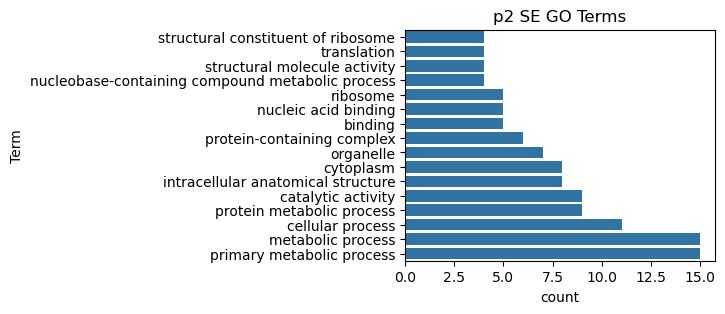

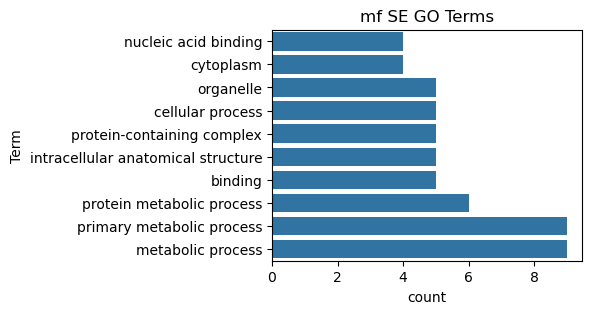

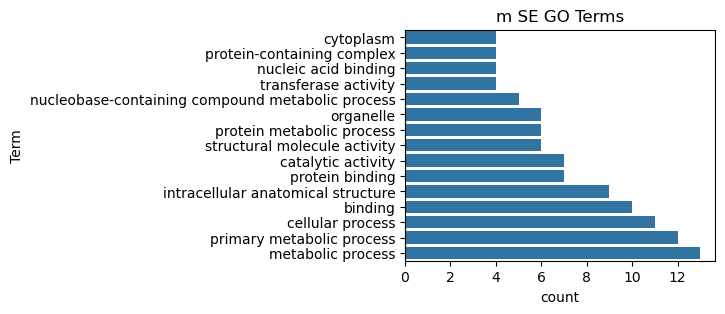

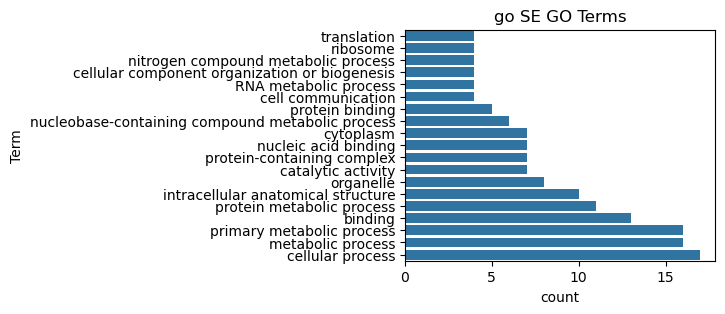

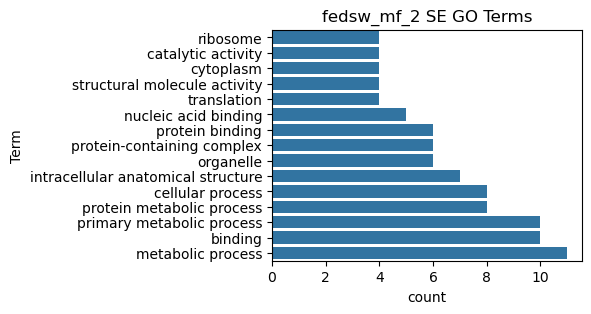

In [49]:
for s in singles:
    plt.figure(figsize=(4,3))
    p2_sub = go_df[go_df.Stages.isin([s])]
    p2_sort = p2_sub.Term.value_counts().sort_values()
    sns.barplot(p2_sort[p2_sort>3],orient='h')
    #plt.xticks(rotation=90)
    plt.title(s+' SE GO Terms')


#### **Fed/SW MMF vs bulk MMF Counts (exon-gene-level counts from featureCounts)**

In [179]:
fed_sc = pd.read_csv('/home/tchari/clytia_alt_splice/counts/fed.txt',skiprows=[0],delimiter='\t')
fed_sc.head()

,Geneid,Chr,Start,End,Strand,Length,/data/tchari/rmats_out/rmats_fedsw_mf_2_tmp/fed_sw_bam1_1/Aligned.sortedByCoord.out.bam
0,MSTRG.1,SckGQDu_100;HRSCAF=164;SckGQDu_100;HRSCAF=164,27692;29747,28920;29819,-;-,1302,3
1,MSTRG.9,SckGQDu_102;HRSCAF=179,52199,53205,-,1007,0
2,MSTRG.10,SckGQDu_102;HRSCAF=179;SckGQDu_102;HRSCAF=179,53413;53413,54369;54369,-;-,957,4
3,MSTRG.12,SckGQDu_102;HRSCAF=179,67549,73481,-,5933,8
4,MSTRG.13,SckGQDu_102;HRSCAF=179;SckGQDu_102;HRSCAF=179;...,89244;89244;138940;138940,89407;89407;139738;139738,+;+;+;+,963,1348


In [180]:
fed_sc.columns = ['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Length','Bam']

In [181]:
fed_sc.head()

,Geneid,Chr,Start,End,Strand,Length,Bam
0,MSTRG.1,SckGQDu_100;HRSCAF=164;SckGQDu_100;HRSCAF=164,27692;29747,28920;29819,-;-,1302,3
1,MSTRG.9,SckGQDu_102;HRSCAF=179,52199,53205,-,1007,0
2,MSTRG.10,SckGQDu_102;HRSCAF=179;SckGQDu_102;HRSCAF=179,53413;53413,54369;54369,-;-,957,4
3,MSTRG.12,SckGQDu_102;HRSCAF=179,67549,73481,-,5933,8
4,MSTRG.13,SckGQDu_102;HRSCAF=179;SckGQDu_102;HRSCAF=179;...,89244;89244;138940;138940,89407;89407;139738;139738,+;+;+;+,963,1348


In [182]:
sw_sc = pd.read_csv('/home/tchari/clytia_alt_splice/counts/sw.txt',skiprows=[0],delimiter='\t')
sw_sc.columns = ['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Length','Bam']
sw_sc.head()

,Geneid,Chr,Start,End,Strand,Length,Bam
0,MSTRG.1,SckGQDu_100;HRSCAF=164;SckGQDu_100;HRSCAF=164,27692;29747,28920;29819,-;-,1302,33
1,MSTRG.9,SckGQDu_102;HRSCAF=179,52199,53205,-,1007,5
2,MSTRG.10,SckGQDu_102;HRSCAF=179;SckGQDu_102;HRSCAF=179,53413;53413,54369;54369,-;-,957,7
3,MSTRG.12,SckGQDu_102;HRSCAF=179,67549,73481,-,5933,6
4,MSTRG.13,SckGQDu_102;HRSCAF=179;SckGQDu_102;HRSCAF=179;...,89244;89244;138940;138940,89407;89407;139738;139738,+;+;+;+,963,519


In [183]:
mf_1 = pd.read_csv('/home/tchari/clytia_alt_splice/counts/mf_1.txt',skiprows=[0],delimiter='\t')
mf_1.columns = ['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Length','Bam']

mf_2 = pd.read_csv('/home/tchari/clytia_alt_splice/counts/mf_2.txt',skiprows=[0],delimiter='\t')
mf_2.columns = ['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Length','Bam']

go_1 = pd.read_csv('/home/tchari/clytia_alt_splice/counts/go_1.txt',skiprows=[0],delimiter='\t')
go_1.columns = ['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Length','Bam']



In [184]:
#nem_starv_1.txt...
nem_1 = pd.read_csv('/home/tchari/clytia_alt_splice/counts/nem_1.txt',skiprows=[0],delimiter='\t')
nem_1.columns = ['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Length','Bam']

nem_starv_1 = pd.read_csv('/home/tchari/clytia_alt_splice/counts/nem_starv_1.txt',skiprows=[0],delimiter='\t')
nem_starv_1.columns = ['Geneid', 'Chr', 'Start', 'End', 'Strand', 'Length','Bam']


SignificanceResult(statistic=0.911205014061696, pvalue=0.0)
PearsonRResult(statistic=0.8263001910596363, pvalue=0.0)


Text(0, 0.5, 'SW SC')

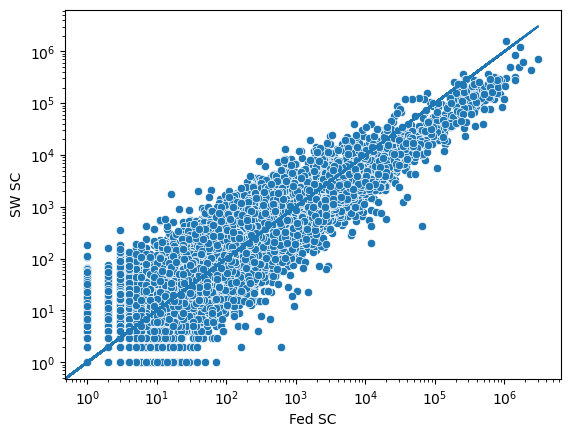

In [185]:
#compare single-cell
sns.scatterplot(x=fed_sc.Bam,y=sw_sc.Bam)
plt.plot(fed_sc.Bam,fed_sc.Bam)
plt.yscale('log')
plt.xscale('log')
print(scipy.stats.spearmanr(fed_sc.Bam,sw_sc.Bam))
print(scipy.stats.pearsonr(fed_sc.Bam,sw_sc.Bam))
plt.xlabel('Fed SC')
plt.ylabel('SW SC')

SignificanceResult(statistic=0.9001105168769206, pvalue=0.0)
PearsonRResult(statistic=0.4993618236803764, pvalue=0.0)


Text(0, 0.5, 'Nem (Fed) SC')

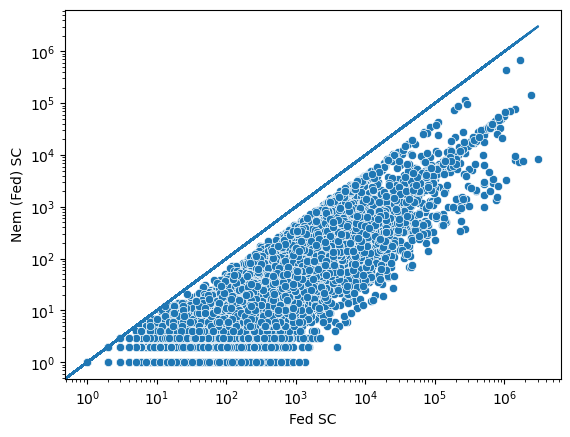

In [186]:
#compare single-cell
sns.scatterplot(x=fed_sc.Bam,y=nem_1.Bam)
plt.plot(fed_sc.Bam,fed_sc.Bam)
plt.yscale('log')
plt.xscale('log')
print(scipy.stats.spearmanr(fed_sc.Bam,nem_1.Bam))
print(scipy.stats.pearsonr(fed_sc.Bam,nem_1.Bam))
plt.xlabel('Fed SC')
plt.ylabel('Nem (Fed) SC')

Fed Median:  153.0 Nem (Fed) Median:  7.0 MMF Median:  328.0


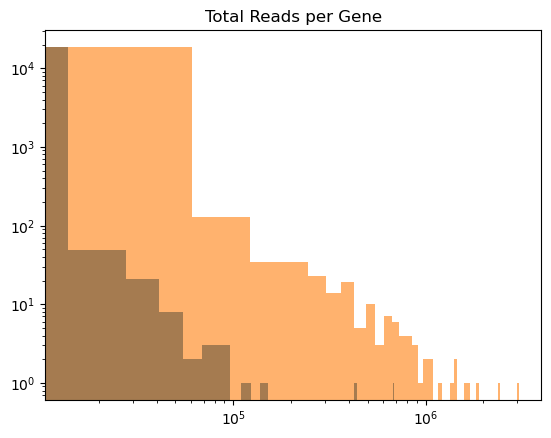

In [197]:
plt.hist(nem_1.Bam,bins=50)
plt.hist(fed_sc.Bam,alpha=0.6,bins=50)
plt.loglog()
plt.title('Total Reads per Gene')
print('Fed Median: ',np.median(fed_sc.Bam), 'Nem (Fed) Median: ',np.median(nem_1.Bam),'MMF Median: ',np.median(mf_1.Bam))

SignificanceResult(statistic=0.9062215551675745, pvalue=0.0)
PearsonRResult(statistic=0.9431820531833509, pvalue=0.0)


Text(0, 0.5, 'Nem (Fed) SC')

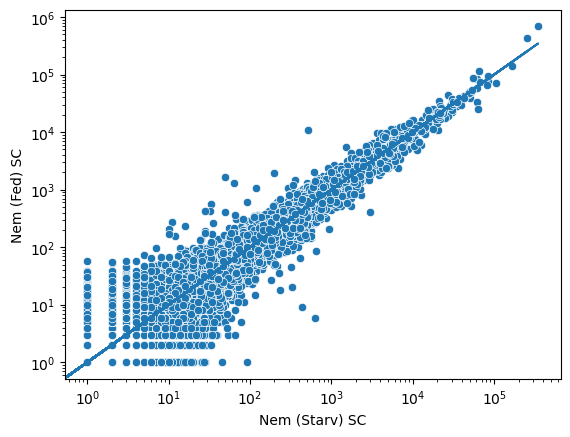

In [187]:
#compare single-cell
sns.scatterplot(x=nem_starv_1.Bam,y=nem_1.Bam)
plt.plot(nem_starv_1.Bam,nem_starv_1.Bam)
plt.yscale('log')
plt.xscale('log')
print(scipy.stats.spearmanr(nem_starv_1.Bam,nem_1.Bam))
print(scipy.stats.pearsonr(nem_starv_1.Bam,nem_1.Bam))
plt.xlabel('Nem (Starv) SC')
plt.ylabel('Nem (Fed) SC')

SignificanceResult(statistic=0.7978266657717661, pvalue=0.0)
PearsonRResult(statistic=0.646026893584569, pvalue=0.0)


Text(0, 0.5, 'MMF 1')

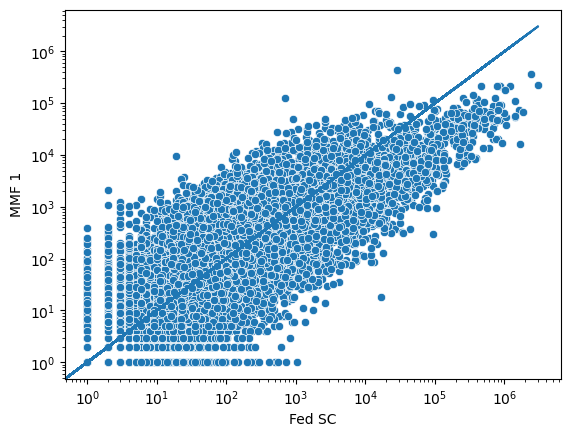

In [71]:
sns.scatterplot(x=fed_sc.Bam,y=mf_1.Bam)
plt.plot(fed_sc.Bam,fed_sc.Bam)
plt.yscale('log')
plt.xscale('log')
print(scipy.stats.spearmanr(fed_sc.Bam,mf_1.Bam))
print(scipy.stats.pearsonr(fed_sc.Bam,mf_1.Bam))
plt.xlabel('Fed SC')
plt.ylabel('MMF 1')

SignificanceResult(statistic=0.8822925855450661, pvalue=0.0)
PearsonRResult(statistic=0.7745376472318295, pvalue=0.0)


Text(0, 0.5, 'MMF 1')

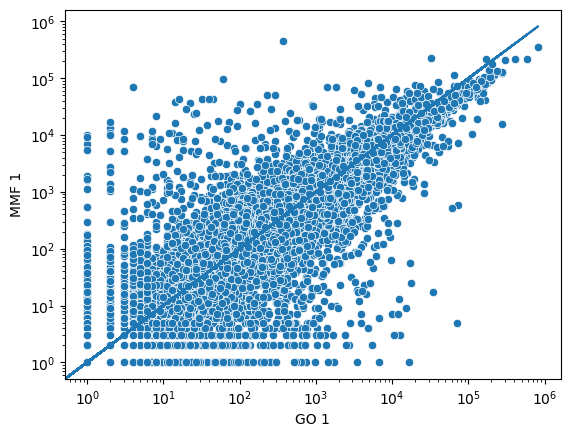

In [72]:
sns.scatterplot(x=go_1.Bam,y=mf_1.Bam)
plt.plot(go_1.Bam,go_1.Bam)
plt.yscale('log')
plt.xscale('log')
print(scipy.stats.spearmanr(go_1.Bam,mf_1.Bam))
print(scipy.stats.pearsonr(go_1.Bam,mf_1.Bam))
plt.xlabel('GO 1')
plt.ylabel('MMF 1')

#### Read depth

In [176]:
#For each data
sums = []
psis = []
stages = []

for d in range(len(singles)):
    for e in events:
        sub = data_arr[d].data[e]
        if len(sub) != 0:
        #Remove IncLevel1 with 'Na'
            inc_filt = [('NA' not in i) for i in sub.IncLevel1]
            sub2 = sub[inc_filt]
            ijcs = np.array([(np.float64(i.split(',')[0])+np.float64(i.split(',')[1]))/2 for i in sub2.IJC_SAMPLE_1])
            sjcs = np.array([(np.float64(i.split(',')[0])+np.float64(i.split(',')[1]))/2 for i in sub2.SJC_SAMPLE_1])
            sums += [(i+s)/2 for i,s in zip(ijcs,sjcs)]
            psis += [(np.float64(i.split(',')[0])+np.float64(i.split(',')[1]))/2 for i in sub2.IncLevel1]
     
            stages +=[all_data[d]]*np.sum(inc_filt)
            

bulk_depth_res = pd.DataFrame()
bulk_depth_res['Mean (IJC+SJC) log10'] = np.log10(sums)
bulk_depth_res['Mean PSI'] = psis
bulk_depth_res['Stage'] = stages
bulk_depth_res.head()
#Convert to float64 'IncLevel1'][0].split(',')[1])

,Mean (IJC+SJC) log10,Mean PSI,Stage
0,1.051153,0.7490,rmats_p2
1,1.217484,0.8100,rmats_p2
2,1.284431,1.0000,rmats_p2
3,0.676694,1.0000,rmats_p2
4,1.801061,0.9855,rmats_p2


<Figure size 500x300 with 0 Axes>

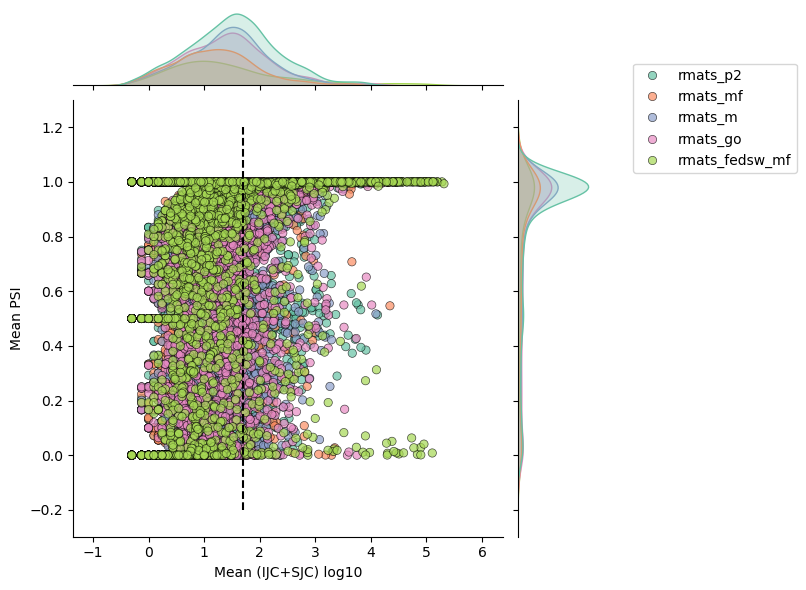

In [177]:
#Read coverage of events --> median IJC + SJC versus PSI (remove NA)
plt.figure(figsize=(5,3))
g = sns.jointplot(data=bulk_depth_res, x="Mean (IJC+SJC) log10", y="Mean PSI", hue="Stage",palette='Set2',alpha=0.7,edgecolor='black')
g.ax_joint.legend(bbox_to_anchor=(1.7, 1.1))
plt.plot([np.log10(50)]*10,np.linspace(-0.2, 1.2, num=10),color='black',linestyle='--')
#plt.title('PSI vs Mean Reads')

### **Between stages**

- Any enrichment of gene types?

- 

In [52]:
len(corr_data) #5-9

10

In [73]:
#For each event get num of sig events, avg reads, 
events = []
avg_reads = []
event_names = []
names = []

for i in range(len(singles),len(all_data)):
    se = corr_data[i].SE.fdr<.1
    events += [np.sum(se)]
    avg_reads += [np.sum(corr_data[i].SE.df[se].Total_reads)/np.sum(se)]
    event_names += ['SE']
    names += [all_data[i]]
    
    a5ss = corr_data[i].A5SS.fdr<.1
    events += [np.sum(a5ss)]
    avg_reads += [np.sum(corr_data[i].A5SS.df[a5ss].Total_reads)/np.sum(a5ss)]
    event_names += ['A5SS']
    names += [all_data[i]]
    
    mxe = corr_data[i].MXE.fdr<.1
    events += [np.sum(mxe)]
    avg_reads += [np.sum(corr_data[i].MXE.df[mxe].Total_reads)/np.sum(mxe)]
    event_names += ['MXE']
    names += [all_data[i]]
    
    ri = corr_data[i].RI.fdr<.1
    events += [np.sum(ri)]
    avg_reads += [np.sum(corr_data[i].RI.df[ri].Total_reads)/np.sum(ri)]
    event_names += ['RI']
    names += [all_data[i]]

sig_events_df = pd.DataFrame()
sig_events_df['Event'] =  event_names  
sig_events_df['Avg_Reads_Per_Event'] =  avg_reads 
sig_events_df['Event_Count'] = events  
sig_events_df['Sample'] =  names 
sig_events_df.head()

,Event,Avg_Reads_Per_Event,Event_Count,Sample
0,SE,161.587963,432,mf_p2
1,A5SS,62.924658,73,mf_p2
2,MXE,919.472727,110,mf_p2
3,RI,126.481132,53,mf_p2
4,SE,176.123384,464,mf_m


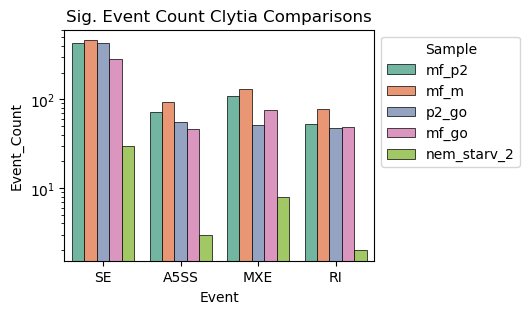

In [173]:
plt.figure(figsize=(4,3))
ax=sns.barplot(x='Event',y='Event_Count',data=sig_events_df,hue='Sample', palette='Set2',edgecolor='black',linewidth=0.5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Sig. Event Count Clytia Comparisons')
plt.yscale('log')

Text(0.5, 1.0, 'Avg Read per Event')

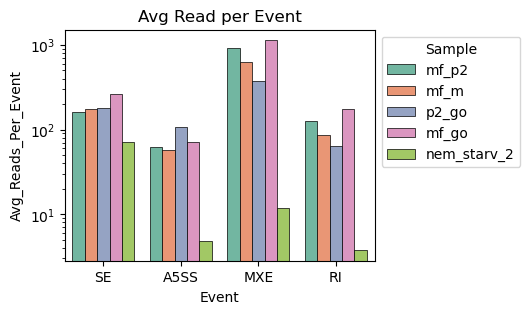

In [84]:
plt.figure(figsize=(4,3))
ax=sns.barplot(x='Event',y='Avg_Reads_Per_Event',data=sig_events_df,hue='Sample', palette='Set2',edgecolor='black',linewidth=0.5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.yscale('log')
plt.title('Avg Read per Event')

In [89]:
dpsis = []
events = []
samples = []
for i in range(len(singles),len(all_data)):

    se = corr_data[i].SE.fdr<.1
    dpsis += list(corr_data[i].SE.df[se].dPSI_corr)
    events += ['SE']*np.sum(se)
    samples += [all_data[i]]*np.sum(se)

    a5ss = corr_data[i].A5SS.fdr<.1
    dpsis += list(corr_data[i].A5SS.df[a5ss].dPSI_corr)
    events += ['A5SS']*np.sum(a5ss)
    samples += [all_data[i]]*np.sum(a5ss)

    mxe = corr_data[i].MXE.fdr<.1
    dpsis += list(corr_data[i].MXE.df[mxe].dPSI_corr)
    events += ['MXE']*np.sum(mxe)
    samples += [all_data[i]]*np.sum(mxe)

    ri = corr_data[i].RI.fdr<.1
    dpsis += list(corr_data[i].RI.df[ri].dPSI_corr)
    events += ['RI']*np.sum(ri)
    samples += [all_data[i]]*np.sum(ri)


dpsis_events_df = pd.DataFrame()
dpsis_events_df['Event'] =  events  
dpsis_events_df['dPSI'] =  dpsis 
dpsis_events_df['Sample'] =  samples 
dpsis_events_df.head()

    

,Event,dPSI,Sample
0,SE,0.118514,mf_p2
1,SE,0.260346,mf_p2
2,SE,0.081229,mf_p2
3,SE,0.471192,mf_p2
4,SE,-0.146168,mf_p2


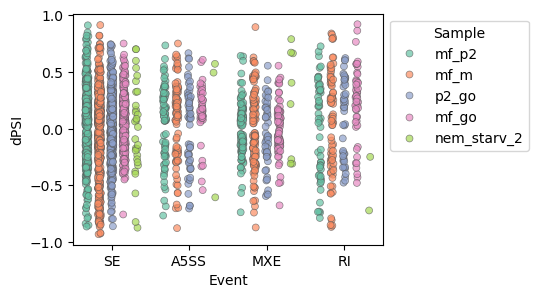

In [102]:
plt.figure(figsize=(4,3))
#sub_dpsis = dpsis_events_df[dpsis_events_df.Event.isin(['SE'])]
ax=sns.stripplot(x='Event',y='dPSI',data=dpsis_events_df,hue='Sample',palette='Set2',dodge=True,linewidth=0.5,alpha=0.6)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))



**GO terms in each comparison**

In [104]:
#For each single cond get SE genes and xlocs
go_list = []
stages_go = []

for i in range(len(singles),len(all_data)):
    se = corr_data[i].SE.fdr<.1
    reads = corr_data[i].SE.df.Total_reads > 50
    sub_gs = corr_data[i].SE.df.GeneID[se&reads] #Gene ids of sig events 

    xlocs = list(c_hem_nr_t2g['0'][c_hem_nr_t2g['1'].isin(sub_gs)])
    
    comp_gos = goTerm_df[1][goTerm_df[0].isin(xlocs)]
    for j in range(len(comp_gos)):
        if comp_gos.iloc[j] == comp_gos.iloc[j]: #Not nan
            go_list += comp_gos.iloc[j].split(',')
            stages_go += [all_data[i]]*len(comp_gos.iloc[j].split(','))

go_df = pd.DataFrame()
go_df['GO'] = go_list
go_df['Stages'] = stages_go
go_df.head()
            
#Save go terms for each cond

,GO,Stages
0,GO:0043234,mf_p2
1,GO:0016020,mf_p2
2,GO:0051169,mf_p2
3,GO:0008104,mf_p2
4,GO:0016021,mf_p2


In [105]:
go_df.to_csv('/home/tchari/clytia_alt_splice/comp_go_df.csv',index=None)

#In R
#library(GO.db)
#go <- read.csv("comp_go_df.csv")
#goterms <- Term(go$GO)
#go$Term <- goterms
#write.csv(go,"comp_go_df.csv")

In [106]:
go_df = pd.read_csv('/home/tchari/clytia_alt_splice/comp_go_df.csv')
go_df.head()

,Unnamed: 0,GO,Stages,Term
0,1,GO:0043234,mf_p2,NaN
1,2,GO:0016020,mf_p2,membrane
2,3,GO:0051169,mf_p2,nuclear transport
3,4,GO:0008104,mf_p2,protein localization
4,5,GO:0016021,mf_p2,NaN


In [114]:
# go_df[go_df.Stages.isin(['nem_starv_2'])]

/home/tchari/rmats_conda_env/lib/python3.10/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


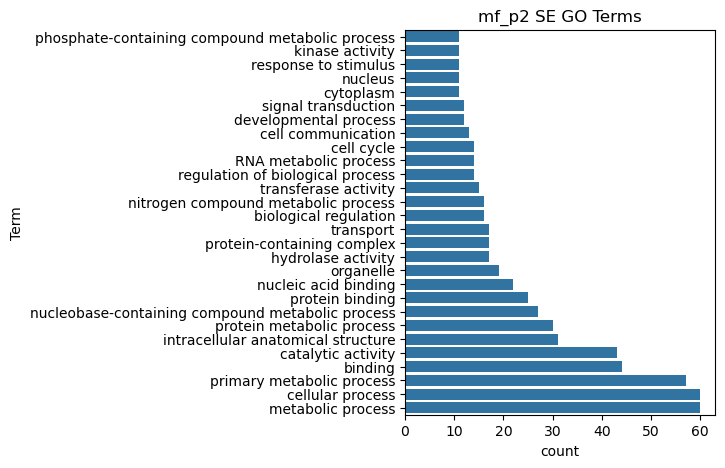

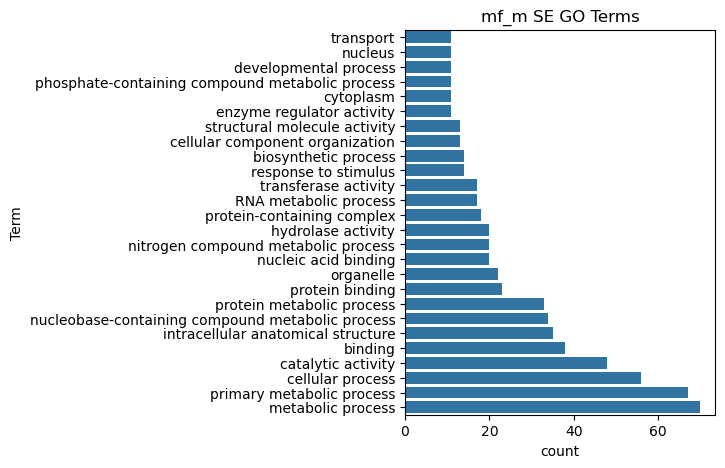

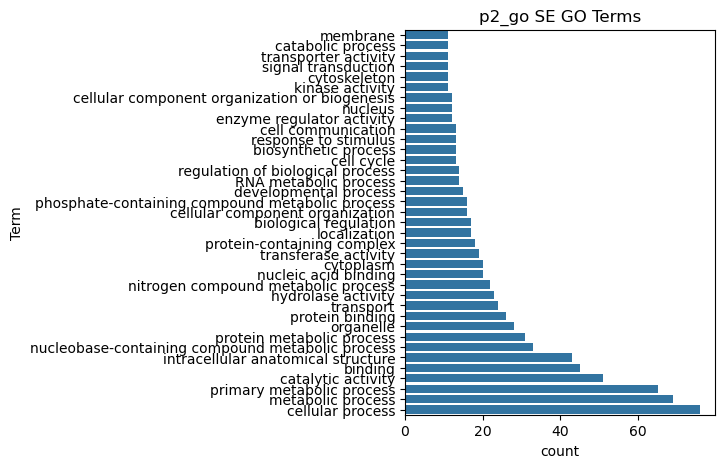

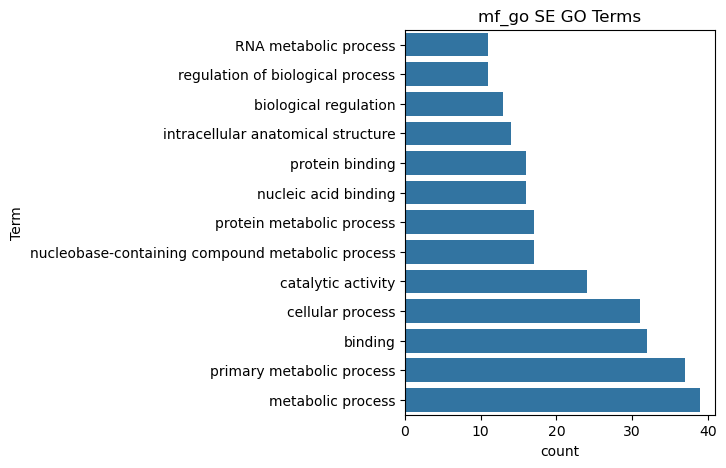

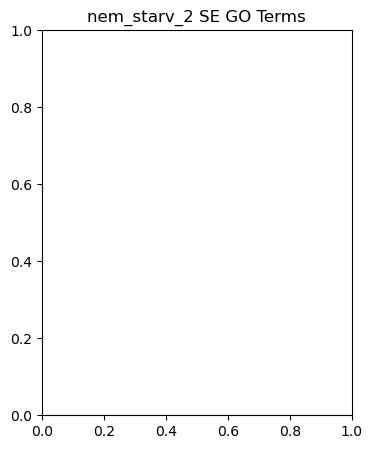

In [113]:
for s in comps:
    plt.figure(figsize=(4,5))
    p2_sub = go_df[go_df.Stages.isin([s])]
    p2_sort = p2_sub.Term.value_counts().sort_values()
    sns.barplot(p2_sort[p2_sort>10],orient='h')
    #plt.xticks(rotation=90)
    plt.title(s+' SE GO Terms')


**ADD ANNOTS TO ALL GENES**

In [151]:
for i in range(len(singles),len(all_data)):
    gs = list(corr_data[i].SE.df.GeneID)
    xloc_list = []
    for g in gs:
        found = list(c_hem_nr_t2g['0'][c_hem_nr_t2g['1'].isin([g])])
        if len(found)==0:
            xloc_list += ['NA']
        else:
            xloc_list += found
    corr_data[i].SE.df['XLOC'] = xloc_list

In [152]:
corr_data[i].SE.df


,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,...,FDR,IncLevel1,IncLevel2,IncLevelDifference,Total_reads,PSI1,PSI2,dPSI_corr,FDR_corr,XLOC
0,1,MSTRG.9137,NaN,chrSckGQDu_149;HRSCAF=336,-,25782981,25783071,25781790,25782059,25783561,...,0.106490,"0.897,1.0","0.766,0.938",0.097,19.25,0.919926,0.846279,0.073646,0.211377,XLOC_013702
1,7,MSTRG.8963,NaN,chrSckGQDu_149;HRSCAF=336,+,23213166,23213238,23212404,23212501,23213645,...,1.000000,"1.0,1.0","0.987,0.986",0.014,117.75,0.985439,0.985281,0.000158,0.424568,XLOC_034759
2,10,MSTRG.8602,NaN,chrSckGQDu_149;HRSCAF=336,+,16885976,16886213,16885464,16885710,16886446,...,1.000000,"1.0,1.0","0.953,1.0",0.024,43.75,0.975268,0.974884,0.000384,0.425470,NA
3,20,MSTRG.8105,NaN,chrSckGQDu_149;HRSCAF=336,+,9163317,9163449,9156220,9156582,9163936,...,1.000000,"1.0,1.0","0.999,0.999",0.001,4308.25,0.999191,0.999151,0.000040,0.446782,NA
4,26,MSTRG.8064,NaN,chrSckGQDu_149;HRSCAF=336,+,8703314,8703370,8696867,8697221,8704177,...,1.000000,"1.0,1.0","0.999,0.999",0.001,4963.50,0.999472,0.999458,0.000014,0.428632,XLOC_018777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,1239,MSTRG.19111,NaN,chrSckGQDu_198;HRSCAF=491,-,12499681,12499738,12499467,12499505,12500283,...,1.000000,"1.0,1.0","0.999,1.0",0.000,2153.00,0.999518,0.999512,0.000006,0.424791,XLOC_043287
220,1248,MSTRG.19535,NaN,chrSckGQDu_198;HRSCAF=491,+,20696486,20696560,20695469,20695548,20698112,...,1.000000,"1.0,0.9","1.0,1.0",-0.050,23.50,0.988642,0.991362,-0.002720,0.670065,XLOC_042471
221,1260,MSTRG.15982,NaN,chrSckGQDu_17;HRSCAF=24,-,30580367,30580403,30580151,30580223,30580475,...,1.000000,"1.0,1.0","1.0,0.446",0.277,4.25,0.723460,0.721595,0.001865,0.424336,NA
222,1286,MSTRG.20590,NaN,chrSckGQDu_22;HRSCAF=46,-,15721700,15721906,15720725,15720954,15727361,...,1.000000,"1.0,1.0","1.0,1.0",0.000,20312.75,0.999895,0.999894,0.000001,0.424690,XLOC_033543


**MF_P2 candidates**

In [122]:
all_data

['p2',
 'mf',
 'm',
 'go',
 'fedsw_mf_2',
 'mf_p2',
 'mf_m',
 'p2_go',
 'mf_go',
 'nem_starv_2']

In [260]:
se = corr_data[5].SE.fdr<.1
reads = corr_data[5].SE.df.Total_reads > 50
sub_gs = corr_data[5].SE.df.GeneID[se&reads] #Gene ids of sig events 

sig_psi = np.abs(corr_data[5].SE.df.dPSI_corr)>0.3
print(len(sub_gs))
xlocs_mf_p2 = list(c_hem_nr_t2g['0'][c_hem_nr_t2g['1'].isin(sub_gs)])

211


In [259]:
corr_data[5].SE.df[corr_data[5].SE.df['XLOC'].isin(['XLOC_030861','XLOC_039594','XLOC_041406'])].style


,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,ID.1,IJC_SAMPLE_1,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference,Total_reads,PSI1,PSI2,dPSI_corr,FDR_corr,XLOC
721,834,MSTRG.24173,nan,chrSckGQDu_90;HRSCAF=138,+,16869148,16869287,16868254,16868325,16870039,16870178,834,"213,222","0,0","153,72","216,146",148,74,0.000000,0.000000,"1.0,1.0","0.262,0.198",0.770000,255.500000,0.998752,0.239099,0.759654,0.000000,XLOC_039594
722,835,MSTRG.24173,nan,chrSckGQDu_90;HRSCAF=138,+,16869148,16869287,16868254,16868325,16870934,16871004,835,"382,445","0,1","292,151","65,51",148,74,0.000000,0.000000,"1.0,0.996","0.692,0.597",0.354000,346.750000,0.996324,0.657163,0.339161,0.000000,XLOC_039594
723,836,MSTRG.24173,nan,chrSckGQDu_90;HRSCAF=138,+,16870039,16870178,16868254,16868325,16870934,16871004,836,"2,0","0,1","475,319","65,51",148,74,0.913509,1.000000,"1.0,0.0","0.785,0.758",-0.272000,228.250000,0.768194,0.774089,-0.005895,0.279515,XLOC_039594
724,837,MSTRG.24173,nan,chrSckGQDu_90;HRSCAF=138,+,16870039,16870178,16869148,16869287,16870934,16871004,837,"2,0","169,223","262,175","142,81",148,74,0.000000,0.000000,"0.006,0.0","0.48,0.519",-0.496000,263.500000,0.005474,0.496142,-0.490668,0.000000,XLOC_039594
1704,1914,MSTRG.11724,nan,chrSckGQDu_151;HRSCAF=341,+,23307755,23313956,23307152,23307222,23314659,23314749,1914,"17,33","30,63","9,13","134,133",148,74,0.000000,0.000000,"0.221,0.208","0.032,0.047",0.175000,108.000000,0.210851,0.044101,0.166750,0.000000,XLOC_041406
1705,1915,MSTRG.11724,nan,chrSckGQDu_151;HRSCAF=341,+,23322630,23322864,23320932,23321025,23325578,23325724,1915,"79,96","0,0","6,4","13,15",148,74,0.000000,0.000000,"1.0,1.0","0.188,0.118",0.847000,53.250000,0.997359,0.183055,0.814304,0.000000,XLOC_041406
1706,1916,MSTRG.11724,nan,chrSckGQDu_151;HRSCAF=341,+,23322630,23322864,23320932,23321025,23326900,23327031,1916,"67,87","2,0","18,5","145,148",148,74,0.000000,0.000000,"0.944,1.0","0.058,0.017",0.934000,118.000000,0.951911,0.041917,0.909994,0.000000,XLOC_041406
1707,1917,MSTRG.11724,nan,chrSckGQDu_151;HRSCAF=341,+,23325578,23326094,23320932,23321025,23326900,23327031,1917,"30,43","2,0","21,27","145,148",148,74,0.000000,0.000000,"0.882,1.0","0.068,0.084",0.865000,104.000000,0.926091,0.079509,0.846582,0.000000,XLOC_041406
1708,1918,MSTRG.11724,nan,chrSckGQDu_151;HRSCAF=341,+,23325578,23326094,23322630,23322864,23326900,23327031,1918,"66,77","24,25","8,13","12,2",148,74,0.509765,1.000000,"0.579,0.606","0.25,0.765",0.085000,56.750000,0.522561,0.453621,0.068939,0.430021,XLOC_041406
4482,5041,MSTRG.4396,nan,chrSckGQDu_13;HRSCAF=20,+,1262392,1262855,1261709,1262091,1263102,1263182,5041,"58,70","51,43","11,13","478,448",148,74,0.000000,0.000000,"0.362,0.449","0.011,0.014",0.393000,293.000000,0.372194,0.014187,0.358007,0.000000,XLOC_030861


In [263]:
#Get top genes for GO
xlocs_mf_p2_sig = list(c_hem_nr_t2g['0'][c_hem_nr_t2g['1'].isin(corr_data[5].SE.df.GeneID[se&reads&sig_psi])])
print(len(np.unique(corr_data[5].SE.df.GeneID[se&reads&sig_psi])))

for i in np.unique(hg_ortho_df.Gene[hg_ortho_df.XLOC.isin(xlocs_mf_p2_sig)]):
    print(i)

32
ADAM8
ADAM9
ARHGEF11
ARHGEF12
CD2AP
CDC42BPA
CDC42BPB
CDC42BPG
CNTN5
CNTN6
COPZ1
L1CAM
LOC105378220
NCL
NME8
NRCAM
PPIC
PPIP5K2
PRKCSH
RACGAP1
RBM10
RBM5
RRBP1
SH3KBP1
SRSF1
SRSF9
TPM2
TPM3
TPM4
TYW1
TYW1B


In [164]:
hg_ortho_df[hg_ortho_df.XLOC.isin(['XLOC_039594','XLOC_041406'])]  
#XLOC_030861 (SRSF1) ,XLOC_039594 (Tropomysin) #XLOC_041406 (Tropomodulin)
# MSTRG.4396, MSTRG.24173, MSTRG.11724	

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,XLOC,TCONS,Gene,gi,Description
2060,5599,22850,Hs,TPM4 gi,223555975,ref,NP_001138632.1,gi,223555975,ref,...,g.77393 ORF TCONS_00063191,g.77393 TCONS_00063191,m.77393 type:complete len:245 (+) TCONS_000631...,many:many,15589.0,XLOC_039594,TCONS_00063191,TPM4,gi,tropomyosin alpha-4 chain isoform Tpm4.1cy [H...
2062,5600,22850,Hs,TPM3 gi,767910352,ref,XP_011508253.1,gi,767910352,ref,...,g.77393 ORF TCONS_00063191,g.77393 TCONS_00063191,m.77393 type:complete len:245 (+) TCONS_000631...,many:many,NaN,XLOC_039594,TCONS_00063191,TPM3,gi,PREDICTED: tropomyosin alpha-3 chain isoform ...
2064,5601,22850,Hs,TPM2 gi,42476296,ref,NP_003280.2,gi,42476296,ref,...,g.77393 ORF TCONS_00063191,g.77393 TCONS_00063191,m.77393 type:complete len:245 (+) TCONS_000631...,many:many,NaN,XLOC_039594,TCONS_00063191,TPM2,gi,tropomyosin beta chain isoform Tpm2.2st [Homo...


In [172]:
hg_ortho_df[hg_ortho_df.XLOC.isin(xlocs_mf_p2)& (np.abs(corr_data[5].SE.df.dPSI_corr)>0.3)] 

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,XLOC,TCONS,Gene,gi,Description
295,711,17434,Hs,SRSF1 gi,5902076,ref,NP_008855.1,gi,5902076,ref,...,g.58757 ORF TCONS_00048539,g.58757 TCONS_00048539,m.58757 type:complete len:205 (+) TCONS_000485...,many:many,NaN,XLOC_030861,TCONS_00048539,SRSF1,gi,serine/arginine-rich splicing factor 1 isofor...
2272,6198,466,Hs,MAPK15 gi,95147356,ref,NP_620590.2,gi,95147356,ref,...,g.1632 ORF TCONS_00001214,g.1632 TCONS_00001214,m.1632 type:complete len:513 (+) TCONS_0000121...,1:1,NaN,XLOC_000658,TCONS_00001214,MAPK15,gi,mitogen-activated protein kinase 15 [Homo sap...
3008,8260,3723,Hs,SLC20A1 gi,31543630,ref,NP_005406.3,gi,31543630,ref,...,g.14102 ORF TCONS_00009941,g.14102 TCONS_00009941,m.14102 type:complete len:539 (+) TCONS_000099...,many:1,NaN,XLOC_005573,TCONS_00009941,SLC20A1,gi,sodium-dependent phosphate transporter 1 [Hom...


In [170]:
#MSTRG.11724	
corr_data[5].SE.df[corr_data[5].SE.df['GeneID'].isin(['MSTRG.11724']) & (np.abs(corr_data[5].SE.df.dPSI_corr)>0.3)].style

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,ID.1,IJC_SAMPLE_1,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference,Total_reads,PSI1,PSI2,dPSI_corr,FDR_corr,XLOC
1705,1915,MSTRG.11724,nan,chrSckGQDu_151;HRSCAF=341,+,23322630,23322864,23320932,23321025,23325578,23325724,1915,"79,96","0,0","6,4","13,15",148,74,0.000000,0.000000,"1.0,1.0","0.188,0.118",0.847000,53.250000,0.997359,0.183055,0.814304,0.000000,XLOC_041406
1706,1916,MSTRG.11724,nan,chrSckGQDu_151;HRSCAF=341,+,23322630,23322864,23320932,23321025,23326900,23327031,1916,"67,87","2,0","18,5","145,148",148,74,0.000000,0.000000,"0.944,1.0","0.058,0.017",0.934000,118.000000,0.951911,0.041917,0.909994,0.000000,XLOC_041406
1707,1917,MSTRG.11724,nan,chrSckGQDu_151;HRSCAF=341,+,23325578,23326094,23320932,23321025,23326900,23327031,1917,"30,43","2,0","21,27","145,148",148,74,0.000000,0.000000,"0.882,1.0","0.068,0.084",0.865000,104.000000,0.926091,0.079509,0.846582,0.000000,XLOC_041406


In [171]:
corr_data[5].SE.df[corr_data[5].SE.df['XLOC'].isin(xlocs_mf_p2) & (np.abs(corr_data[5].SE.df.dPSI_corr)>0.3)].style

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,ID.1,IJC_SAMPLE_1,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference,Total_reads,PSI1,PSI2,dPSI_corr,FDR_corr,XLOC
136,158,MSTRG.7335,nan,chrSckGQDu_148;HRSCAF=334,-,22487381,22487435,22486518,22486620,22487591,22487705,158,"25,32","45,31","51,57","4,6",128,74,0.000000,0.000000,"0.243,0.374","0.881,0.846",-0.555000,62.750000,0.326048,0.861921,-0.535873,0.000000,XLOC_021082
218,256,MSTRG.6327,nan,chrSckGQDu_148;HRSCAF=334,+,6747537,6747567,6746815,6746900,6748183,6748266,256,"9,10","3,7","21,10","92,125",104,74,0.000000,0.000003,"0.681,0.504","0.14,0.054",0.496000,69.250000,0.560965,0.099296,0.461670,0.000001,XLOC_001924
250,292,MSTRG.6045,nan,chrSckGQDu_148;HRSCAF=334,-,2400998,2401043,2400189,2400256,2402137,2402250,292,"63,76","0,0","40,22","46,44",119,74,0.000000,0.000000,"1.0,1.0","0.351,0.237",0.706000,72.750000,0.997766,0.308212,0.689554,0.000000,XLOC_037574
407,476,MSTRG.4376,nan,chrSckGQDu_13;HRSCAF=20,+,1089980,1090013,1089561,1089692,1090403,1090481,476,"84,118","13,27","66,48","116,47",107,74,0.000000,0.000000,"0.817,0.751","0.282,0.414",0.436000,129.750000,0.773415,0.330753,0.442662,0.000000,XLOC_030865
721,834,MSTRG.24173,nan,chrSckGQDu_90;HRSCAF=138,+,16869148,16869287,16868254,16868325,16870039,16870178,834,"213,222","0,0","153,72","216,146",148,74,0.000000,0.000000,"1.0,1.0","0.262,0.198",0.770000,255.500000,0.998752,0.239099,0.759654,0.000000,XLOC_039594
722,835,MSTRG.24173,nan,chrSckGQDu_90;HRSCAF=138,+,16869148,16869287,16868254,16868325,16870934,16871004,835,"382,445","0,1","292,151","65,51",148,74,0.000000,0.000000,"1.0,0.996","0.692,0.597",0.354000,346.750000,0.996324,0.657163,0.339161,0.000000,XLOC_039594
724,837,MSTRG.24173,nan,chrSckGQDu_90;HRSCAF=138,+,16870039,16870178,16869148,16869287,16870934,16871004,837,"2,0","169,223","262,175","142,81",148,74,0.000000,0.000000,"0.006,0.0","0.48,0.519",-0.496000,263.500000,0.005474,0.496142,-0.490668,0.000000,XLOC_039594
913,1050,MSTRG.23544,nan,chrSckGQDu_90;HRSCAF=138,+,5601565,5601646,5601276,5601307,5602187,5602298,1050,"21,25","18,15","75,74","6,11",148,74,0.000000,0.000007,"0.368,0.455","0.862,0.771",-0.405000,61.250000,0.439240,0.814686,-0.375446,0.000004,XLOC_008842
992,1137,MSTRG.22917,nan,chrSckGQDu_83;HRSCAF=119,+,26169089,26169176,26168626,26168779,26169535,26169619,1137,"3,8","56,67","368,361","107,115",148,74,0.000000,0.000000,"0.026,0.056","0.632,0.611",-0.580000,271.250000,0.052477,0.622076,-0.569600,0.000000,XLOC_019433
993,1138,MSTRG.22917,nan,chrSckGQDu_83;HRSCAF=119,+,26169089,26169176,26168626,26168779,26172334,26172463,1138,"0,4","102,102","184,166","77,58",148,74,0.000000,0.000000,"0.0,0.019","0.544,0.589",-0.557000,173.250000,0.015309,0.565924,-0.550615,0.000000,XLOC_019433


In [134]:
panther_df[panther_df[0].isin(xlocs_mf_p2)]

,0,1,2,3,4,5
4,XLOC_002829,PTHR24012:SF786,"RNA-BINDING MOTIF, SINGLE-STRANDED-INTERACTING...",1.900000e-83,281.2,214-408
198,XLOC_014076,PTHR24126:SF14,"ANKYRIN REPEAT, PH AND SEC7 DOMAIN CONTAINING ...",2.600000e-87,294.1,114-156
216,XLOC_010518,PTHR11808:SF15,CYSTATHIONINE GAMMA-LYASE,1.200000e-84,285.0,14-215
677,XLOC_037365,PTHR12411:SF57,CATHEPSIN L1,5.200000e-90,302.4,30-328
794,XLOC_001649,PTHR24055:SF109,MITOGEN-ACTIVATED PROTEIN KINASE 11,1.100000e-159,531.4,6-355
...,...,...,...,...,...,...
19640,XLOC_030338,PTHR10501:SF41,PROTEIN COUCH POTATO,2.300000e-51,176.1,244-163
19761,XLOC_043136,PTHR12315:SF0,7SK SNRNA METHYLPHOSPHATE CAPPING ENZYME,5.100000e-22,79.4,134-307
19806,XLOC_031379,PTHR16038:SF4,WD REPEAT-CONTAINING PROTEIN 74,9.900000e-93,311.9,6-359
20001,XLOC_004709,PTHR23167:SF52,SMOOTHELIN,7.600000e-32,111.5,733-836


In [166]:
panther_df[panther_df[0].isin(['XLOC_041406'])]

,0,1,2,3,4,5
8568,XLOC_041406,PTHR10901,TROPOMODULIN,6.200000e-49,167.8,30-379


In [139]:
p_sub = panther_df[panther_df[0].isin(xlocs_mf_p2)]
p_sub[['NEUR' in i for i in p_sub[2]]]

,0,1,2,3,4,5
10557,XLOC_040859,PTHR44170:SF12,NEUROFASCIN,7.700000e-147,491.4,1052-1032
15014,XLOC_029321,PTHR46439,CYSTEINE-RICH MOTOR NEURON 1 PROTEIN,4.400000e-34,118.7,110-107


**Fed/Starved Nematocytes**

*****NOTE THAT SAMPLE1 - STARV   SAMPLE2 - FED*****

In [126]:
se = corr_data[-1].SE.fdr<.1
reads = corr_data[-1].SE.df.Total_reads > 50
sub_gs = corr_data[-1].SE.df.GeneID[se&reads] #Gene ids of sig events 
print(len(sub_gs))
xlocs_nem_starv = list(c_hem_nr_t2g['0'][c_hem_nr_t2g['1'].isin(sub_gs)])

9


In [124]:
hg_ortho_df[hg_ortho_df.XLOC.isin(xlocs_nem_starv)]

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,XLOC,TCONS,Gene,gi,Description
282,675,21995,Hs,LYAR gi,224591430,ref,NP_001139197.1,gi,224591430,ref,...,g.74545 ORF TCONS_00060951,g.74545 TCONS_00060951,m.74545 type:complete len:320 (+) TCONS_000609...,1:1,22661.0,XLOC_038262,TCONS_00060951,LYAR,gi,cell growth-regulating nucleolar protein [Hom...
636,1592,19467,Hs,NCL gi,55956788,ref,NP_005372.2,gi,55956788,ref,...,g.66496 ORF TCONS_00054159,g.66496 TCONS_00054159,m.66496 type:complete len:609 (+) TCONS_000541...,1:1,NaN,XLOC_034176,TCONS_00054159,NCL,gi,nucleolin [Homo sapiens]


In [125]:
panther_df[panther_df[0].isin(xlocs_nem_starv)] #, XLOC_040448 MSTRG.6955	 (GLUTATHIONE S-TRANSFERASE) , 
#What does XLOC_019170 mean? ,XLOC_041417 MSTRG.11750	(LIN52) DNA-templated transcription


,0,1,2,3,4,5
4214,XLOC_019170,PTHR33393,POLYGLUTAMINE SYNTHESIS ACCESSORY PROTEIN RV05...,1.800000e-33,116.2,4-234
6957,XLOC_019546,PTHR23253,EUKARYOTIC TRANSLATION INITIATION FACTOR 4 GAMMA,2.700000e-17,63.1,62-184
9628,XLOC_034176,PTHR48024:SF11,NUCLEAR LOCALIZATION SEQUENCE-BINDING PROTEIN,2.400000e-46,159.0,160-604
12268,XLOC_040448,PTHR11571,GLUTATHIONE S-TRANSFERASE,5.000000e-50,170.8,3-201
13654,XLOC_009002,PTHR34407,EXPRESSED PROTEIN,4.300000e-54,184.7,935-1332
13797,XLOC_000971,PTHR22781,DELTA ADAPTIN-RELATED,3.500000e-04,19.4,51-195
13798,XLOC_000971,PTHR22781:SF12,AP-3 COMPLEX SUBUNIT DELTA-1,3.500000e-04,19.4,51-195
14157,XLOC_038262,PTHR13100,CELL GROWTH-REGULATING NUCLEOLAR PROTEIN LYAR,4.100000e-76,257.3,1-316
15002,XLOC_041417,PTHR31489,LIN52 FAMILY MEMBER,3.800000e-27,95.3,85-206


In [174]:
corr_data[-1].SE.df[corr_data[-1].SE.df['XLOC'].isin(xlocs_nem_starv)].style

,ID,GeneID,geneSymbol,chr,strand,exonStart_0base,exonEnd,upstreamES,upstreamEE,downstreamES,downstreamEE,ID.1,IJC_SAMPLE_1,SJC_SAMPLE_1,IJC_SAMPLE_2,SJC_SAMPLE_2,IncFormLen,SkipFormLen,PValue,FDR,IncLevel1,IncLevel2,IncLevelDifference,Total_reads,PSI1,PSI2,dPSI_corr,FDR_corr,XLOC
15,66,MSTRG.6405,nan,chrSckGQDu_148;HRSCAF=334,-,7963951,7964164,7963334,7963412,7964656,7964989,66,"89,68","82,84","101,55","187,239",300,150,0.000002,0.000084,"0.352,0.288","0.213,0.103",0.162000,226.250000,0.319883,0.155440,0.164443,0.000125,XLOC_009002
45,292,MSTRG.6267,nan,chrSckGQDu_148;HRSCAF=334,-,5684916,5685031,5682883,5683495,5685684,5685916,292,"1,3","21,28","45,34","54,41",265,150,0.000000,0.000000,"0.026,0.057","0.321,0.319",-0.279000,56.750000,0.052791,0.322008,-0.269217,0.000001,XLOC_019170
49,315,MSTRG.22358,nan,chrSckGQDu_83;HRSCAF=119,-,18626631,18626724,18626424,18626502,18627618,18627708,315,"334,345","9,6","134,113","4,0",243,150,0.279688,0.803207,"0.958,0.973","0.954,1.0",-0.011000,236.250000,0.972616,0.973227,-0.000611,0.914054,XLOC_034176
50,316,MSTRG.22358,nan,chrSckGQDu_83;HRSCAF=119,-,18627618,18627708,18626424,18626502,18627961,18628051,316,"10,6","2,5","5,1","10,6",240,150,0.005651,0.040832,"0.758,0.429","0.238,0.094",0.428000,11.250000,0.533305,0.209827,0.323479,0.074106,XLOC_034176
51,317,MSTRG.22358,nan,chrSckGQDu_83;HRSCAF=119,-,18627618,18627708,18626631,18626724,18627961,18628051,317,"297,312","0,1","121,110","4,8",240,150,0.000015,0.000286,"1.0,0.995","0.95,0.896",0.075000,213.250000,0.995766,0.922302,0.073464,0.000536,XLOC_034176
52,318,MSTRG.22358,nan,chrSckGQDu_83;HRSCAF=119,-,18627618,18627708,18626631,18626724,18628321,18628414,318,"296,312","2,2","120,109","0,0",240,150,1.000000,1.000000,"0.989,0.99","1.0,1.0",-0.010000,210.250000,0.998520,0.998545,-0.000025,0.620795,XLOC_034176
53,319,MSTRG.22358,nan,chrSckGQDu_83;HRSCAF=119,-,18627961,18628051,18626656,18626724,18628321,18628414,319,"25,19","2,2","16,20","0,0",240,150,0.015496,0.099176,"0.887,0.856","1.0,1.0",-0.129000,21.000000,0.948209,0.990999,-0.042790,0.259270,XLOC_034176
54,321,MSTRG.22358,nan,chrSckGQDu_83;HRSCAF=119,-,18628321,18628414,18627961,18628051,18628722,18628815,321,"58,35","0,0","37,28","1,0",243,150,1.000000,1.000000,"1.0,1.0","0.958,1.0",0.021000,39.750000,0.971476,0.971123,0.000354,0.424850,XLOC_034176
55,322,MSTRG.22358,nan,chrSckGQDu_83;HRSCAF=119,-,18628722,18628815,18627961,18628051,18633144,18633264,322,"5,5","0,0","7,4","2,2",243,150,0.000972,0.009070,"1.0,1.0","0.684,0.552",0.382000,6.250000,0.961701,0.635456,0.326246,0.018943,XLOC_034176
56,323,MSTRG.22358,nan,chrSckGQDu_83;HRSCAF=119,-,18631971,18632043,18628722,18628815,18633144,18633264,323,"39,42","13,7","18,12","9,4",222,150,0.234731,0.720272,"0.67,0.802","0.575,0.67",0.113000,36.000000,0.655357,0.612388,0.042968,0.646373,XLOC_034176


**CHECK MXE EVENTS**

### **Validate some of these with FISH?**